In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_name = 'block_11_layer_Hidden_State_epoch_2_iteration_1250_min_median_ratios'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/token_probing/token_probing_results_pertensor_wg_fp_with_qk_layernorm/Hidden_State/{file_name}.csv'  # 파일 경로를 실제 파일 경로로 바꿔주세요.

data = pd.read_csv(file_path)
k = 50
# X축 라벨 정의 (Col1 ~ Col197)
x_labels = [f"Col{i}" for i in range(1, k+1)]
x_values = list(range(1, k+1))

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 각 행을 선으로 플롯
for index, row in data.iterrows():
    plt.plot(x_values, row[:k], label=f"Row {index}")

# 그래프에 라벨 추가
plt.ylim(0,5000)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Top 50 Token outlier")
plt.xticks(x_values, x_labels, rotation=90)
plt.grid(True)

# 범례 추가 (범례가 너무 많으면 생략 가능)
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))

# 그래프 출력
plt.tight_layout()
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/home/shkim/QT_DeiT_small/reproduce/token_probing/token_probing_results_pertensor_wg_fp_with_qk_layernorm/Hidden_State/block_11_layer_Hidden_State_epoch_2_iteration_1250_min_median_ratios.csv'

Col1     468.303349
Col2     398.670442
Col3     506.254993
Col4     445.038633
Col5     412.869486
Col6     391.212860
Col7     419.069275
Col8     391.158713
Col9     415.564345
Col10    436.436616
Col11    400.638861
Col12    387.901741
Col13    399.579617
Col14    417.549625
Col15    417.153299
Col16    423.278501
Col17    368.589892
Col18    410.659990
Col19    418.870797
Col20    465.004019
dtype: float64


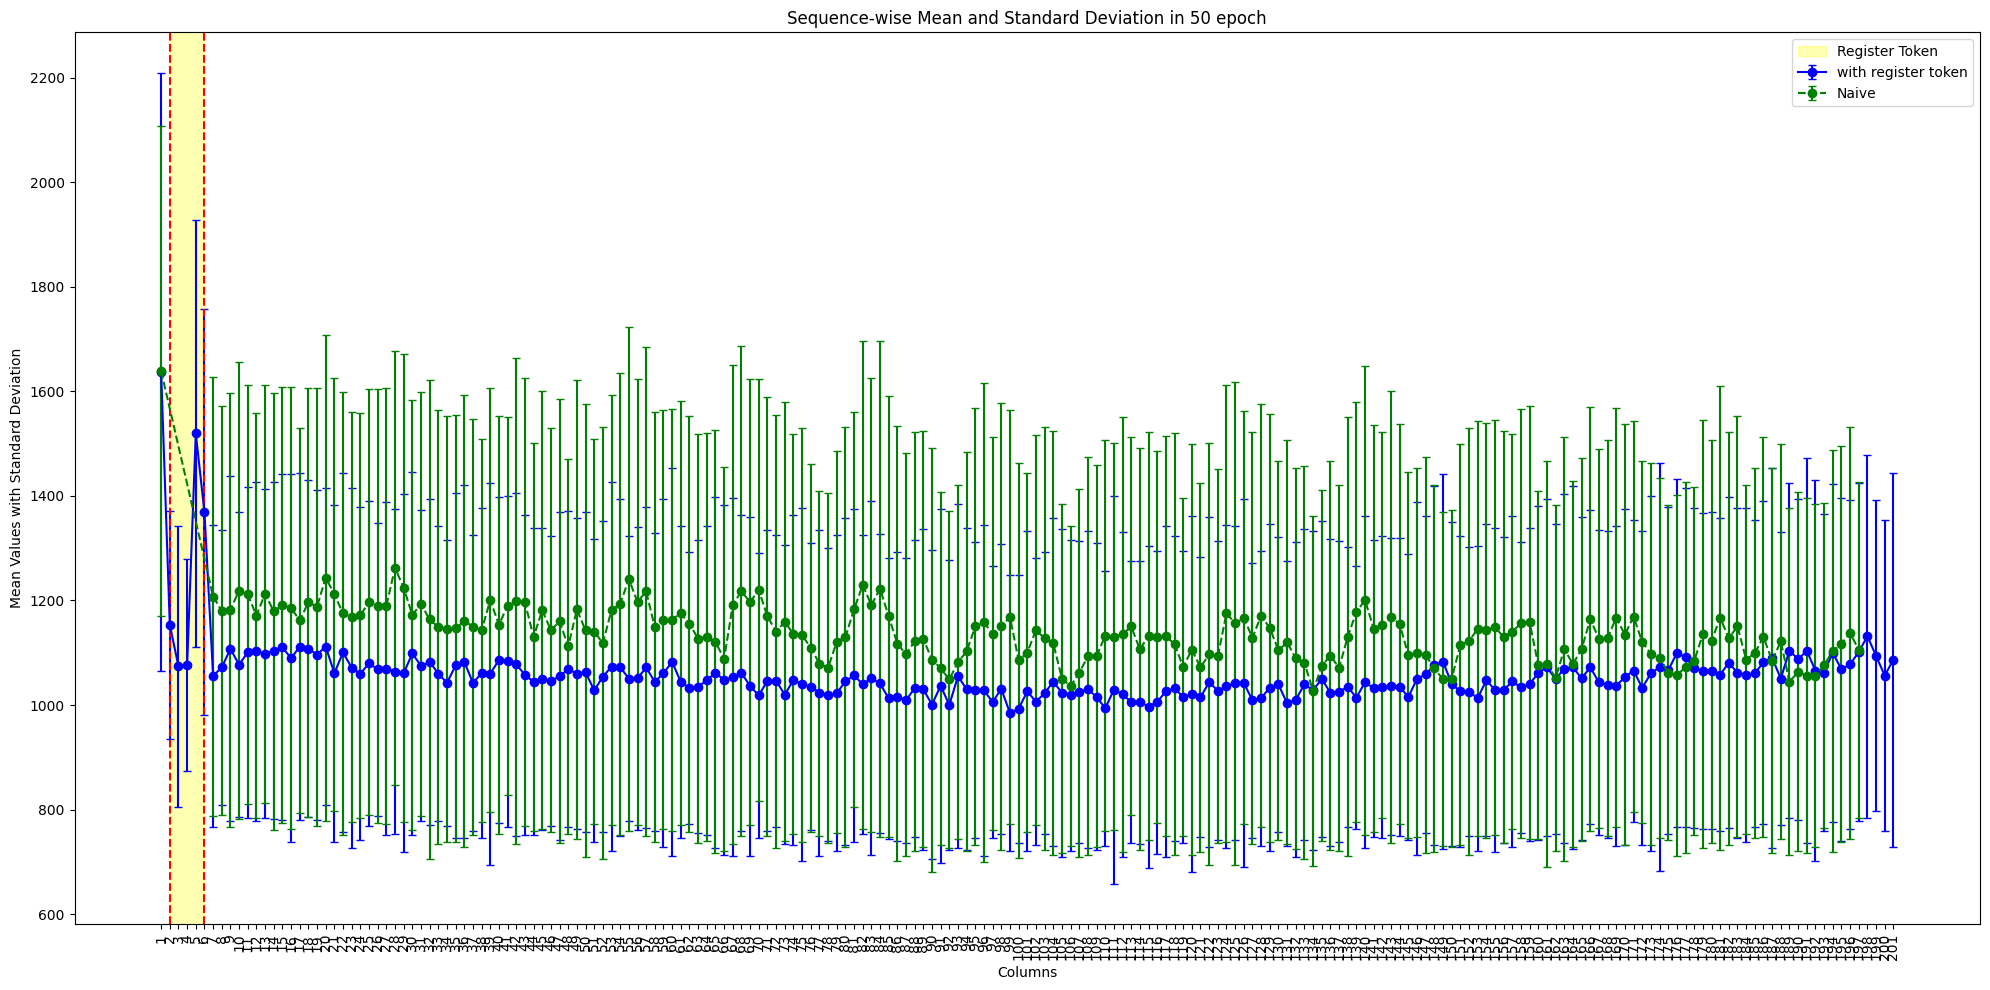

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 CSV 파일 경로
epoch = 50
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# 첫 번째 데이터 X축 정의 및 평균 및 표준 편차 계산
x_labels1 = [f"{i}" for i in range(1, k1+1)]
x_values1 = list(range(1, k1+1))
column_means1 = data1.iloc[:, :k1].mean(axis=0)
column_std1 = data1.iloc[:, :k1].std(axis=0)

# 두 번째 CSV 파일 경로
file_name2 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1_max'
file_path2 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name2}.csv'
data2 = pd.read_csv(file_path2)
k2 = 197

# 두 번째 데이터 X축 정의 및 평균 및 표준 편차 계산
x_labels2 = [f"{i}" for i in range(1, k2+1)]
x_values2 = list(range(1, k2+1))
column_means2 = data2.iloc[:, :k2].mean(axis=0)
column_std2 = data2.iloc[:, :k2].std(axis=0)
print(column_std2[:20])

# 공백 처리: 2~6 제외한 데이터
x_values2_filtered = x_values2[:1] + x_values2[6:]  # 1번째 값과 7번째 이후 값을 유지
column_means2_filtered = list(column_means2[:1]) + list(column_means2[6:])  # 필터링
column_std2_filtered = list(column_std2[:1]) + list(column_std2[6:])  # 필터링된 표준 편차

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 데이터 플롯 (평균과 표준 편차)
plt.errorbar(x_values1, column_means1, yerr=column_std1, fmt='o', linestyle='-', color='blue', label='with register token', capsize=3)

# 두 번째 데이터 플롯 (필터링된 값만 표시, 평균과 표준 편차)
plt.errorbar(x_values2_filtered, column_means2_filtered, yerr=column_std2_filtered, fmt='o', linestyle='--', color='green', label='Naive', capsize=3)

# X축 범위 강조 (2~6 영역)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=6, color='red', linestyle='--', linewidth=1.5)
plt.axvspan(2, 6, color='yellow', alpha=0.3, label='Register Token')

# 그래프 라벨 및 범례
plt.xlabel("Columns")
plt.ylabel("Mean Values with Standard Deviation")
plt.title(f"Sequence-wise Mean and Standard Deviation in {epoch} epoch")
plt.xticks(x_values1, x_labels1, rotation=90)
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


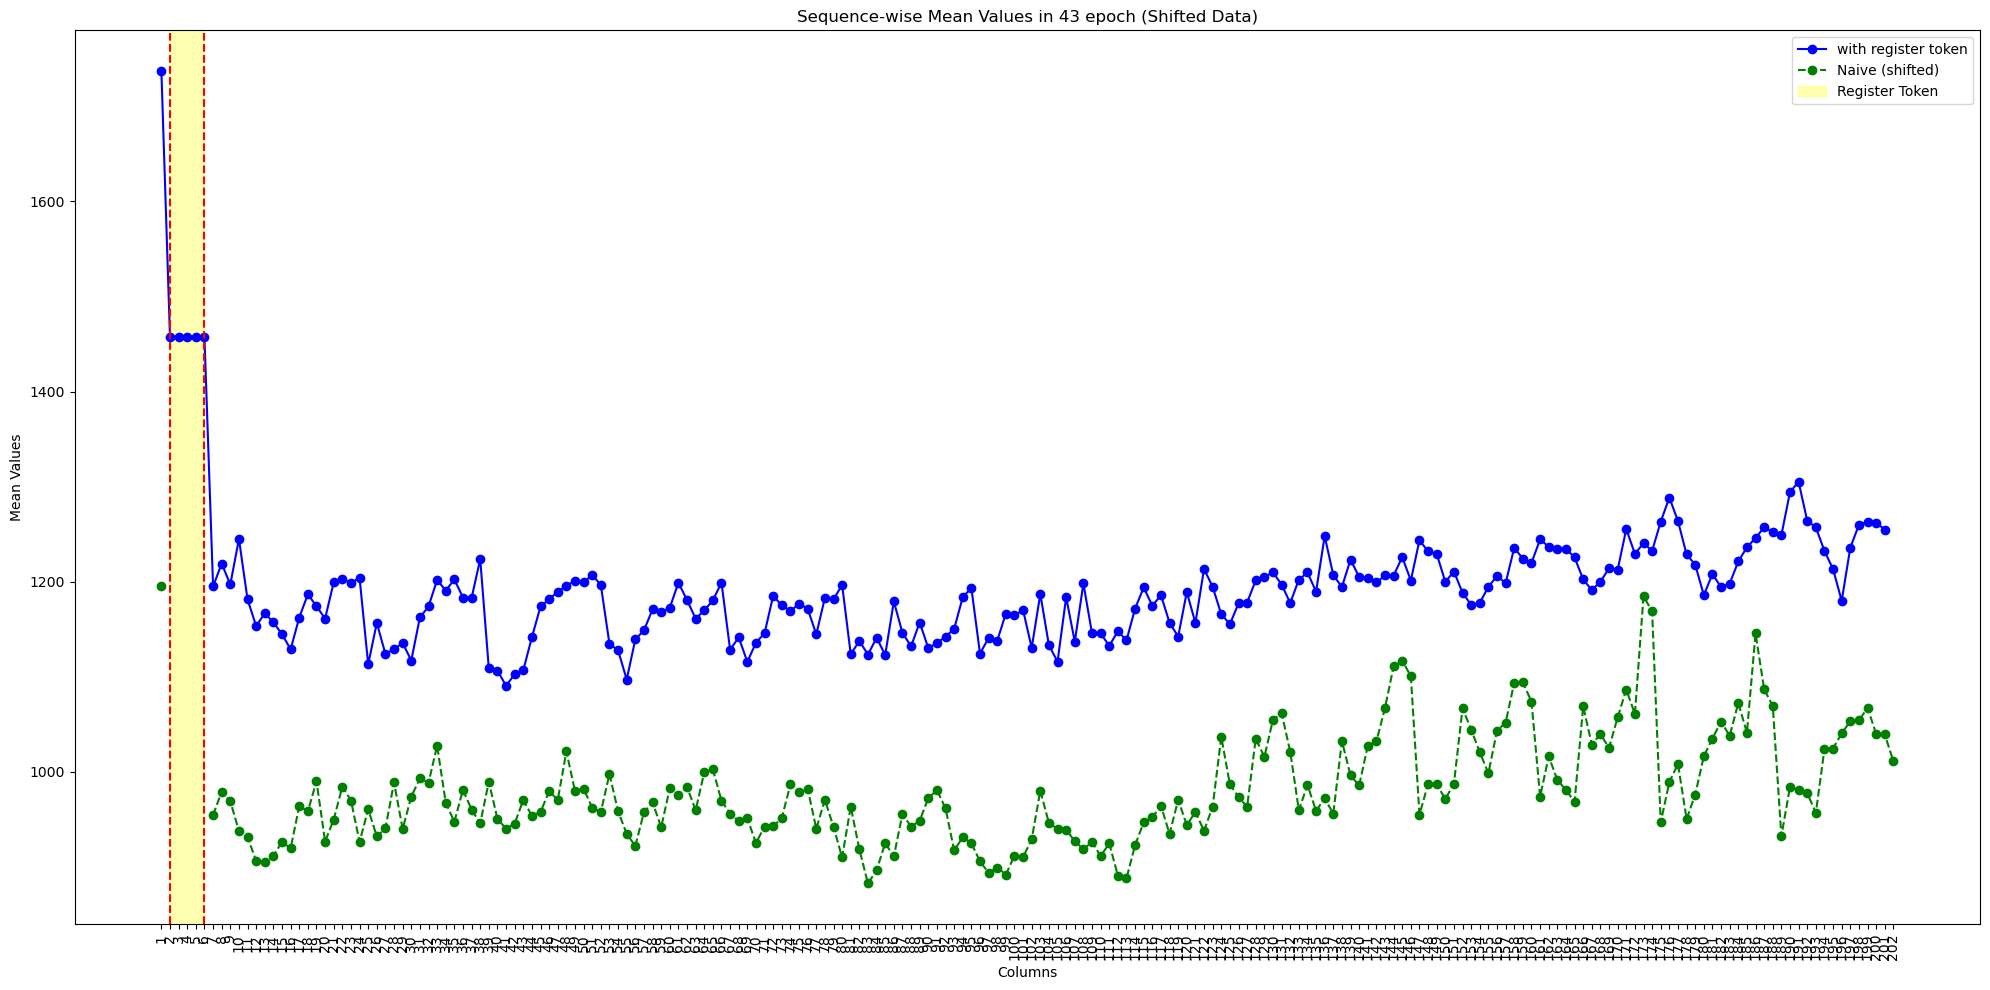

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 첫 번째 CSV 파일 경로
epoch = 43
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_white_patch_init_register_CC_fp16/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# 첫 번째 데이터 X축 정의 및 평균 계산
x_labels1 = [f"{i}" for i in range(1, k1+1)]
x_values1 = list(range(1, k1+1))
column_means1 = data1.iloc[:, :k1].mean(axis=0)

# 두 번째 CSV 파일 경로
file_name2 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1_max'
file_path2 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name2}.csv'
data2 = pd.read_csv(file_path2)
k2 = 197

# 두 번째 데이터 X축 정의 및 평균 계산
x_labels2 = [f"{i}" for i in range(1, k2+1)]
x_values2 = list(range(1, k2+1))
column_means2 = data2.iloc[:, :k2].mean(axis=0)

# 두 번째 데이터의 첫 번째 열은 유지하고 나머지 열은 shift
shift_amount = 5
column_means2_shifted = list(column_means2[:1]) + [np.nan] * shift_amount + list(column_means2[1:])  # 첫 번째 열 유지 후 나머지 shift
x_values2_shifted = list(range(1, len(column_means2_shifted) + 1))  # X축 값을 Y축 데이터 길이에 맞게 확장

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 데이터 플롯
plt.plot(x_values1, column_means1, marker='o', linestyle='-', color='blue', label='with register token')

# 두 번째 데이터 플롯 (shift된 값 표시)
plt.plot(x_values2_shifted, column_means2_shifted, marker='o', linestyle='--', color='green', label='Naive (shifted)')

# X축 범위 강조 (2~6 영역)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=6, color='red', linestyle='--', linewidth=1.5)
plt.axvspan(2, 6, color='yellow', alpha=0.3, label='Register Token')

# 그래프 라벨 및 범례
plt.xlabel("Columns")
plt.ylabel("Mean Values")
plt.title(f"Max mean")
plt.xticks(x_values2_shifted, rotation=90)
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


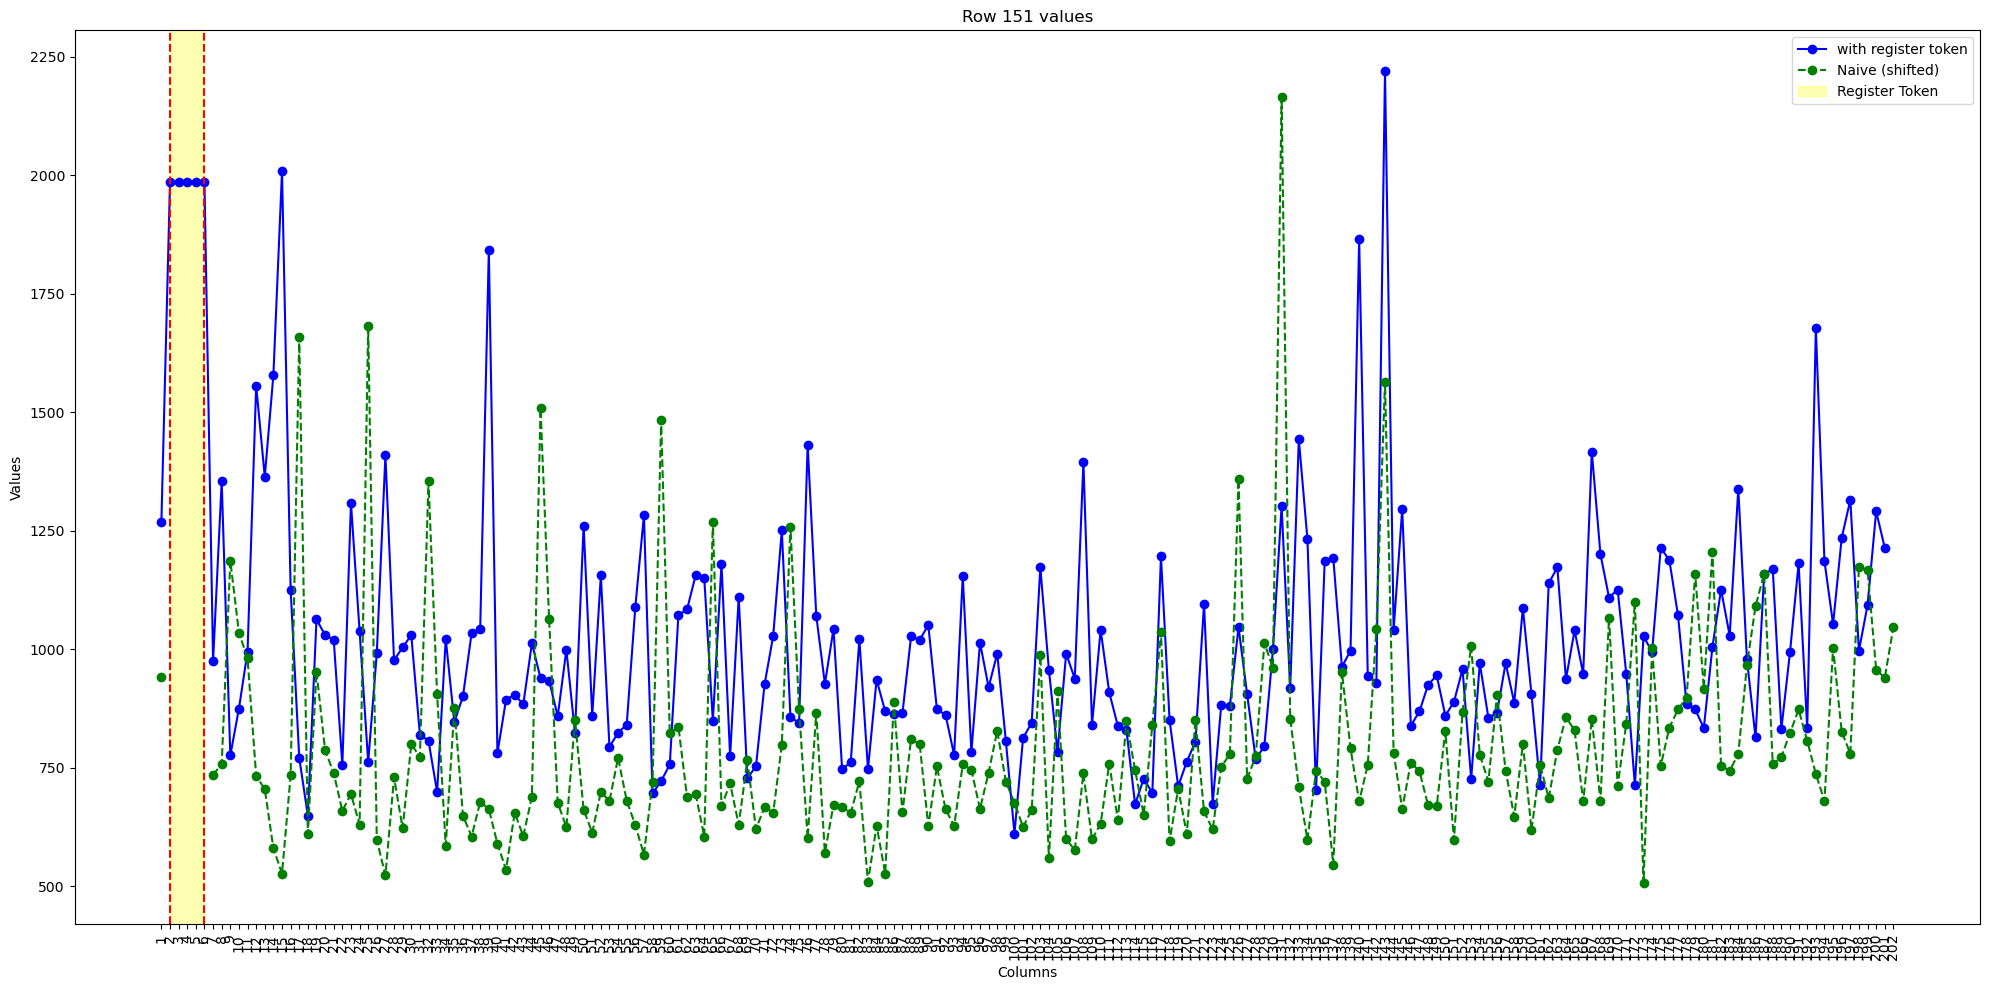

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 첫 번째 CSV 파일 경로
epoch = 43
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_white_patch_init_register_CC_fp16/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# m번째 row 선택
m = 150  # 원하는 row 인덱스 설정 (0부터 시작)
x_labels1 = [f"{i}" for i in range(1, k1+1)]
x_values1 = list(range(1, k1+1))
row_values1 = data1.iloc[m, :k1]

# 두 번째 CSV 파일 경로
file_name2 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1_max'
file_path2 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name2}.csv'
data2 = pd.read_csv(file_path2)
k2 = 197

# 두 번째 데이터 X축 정의 및 m번째 row 선택
x_labels2 = [f"{i}" for i in range(1, k2+1)]
x_values2 = list(range(1, k2+1))
row_values2 = data2.iloc[m, :k2]

# 두 번째 데이터의 첫 번째 열은 유지하고 나머지 열은 shift
shift_amount = 5
row_values2_shifted = list(row_values2[:1]) + [np.nan] * shift_amount + list(row_values2[1:])  # 첫 번째 열 유지 후 나머지 shift
x_values2_shifted = list(range(1, len(row_values2_shifted) + 1))  # X축 값을 Y축 데이터 길이에 맞게 확장

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 데이터 플롯
plt.plot(x_values1, row_values1, marker='o', linestyle='-', color='blue', label='with register token')

# 두 번째 데이터 플롯 (shift된 값 표시)
plt.plot(x_values2_shifted, row_values2_shifted, marker='o', linestyle='--', color='green', label='Naive (shifted)')

# X축 범위 강조 (2~6 영역)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=6, color='red', linestyle='--', linewidth=1.5)
plt.axvspan(2, 6, color='yellow', alpha=0.3, label='Register Token')

# 그래프 라벨 및 범례
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title(f"Row {m + 1} values")
plt.xticks(x_values2_shifted, rotation=90)
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


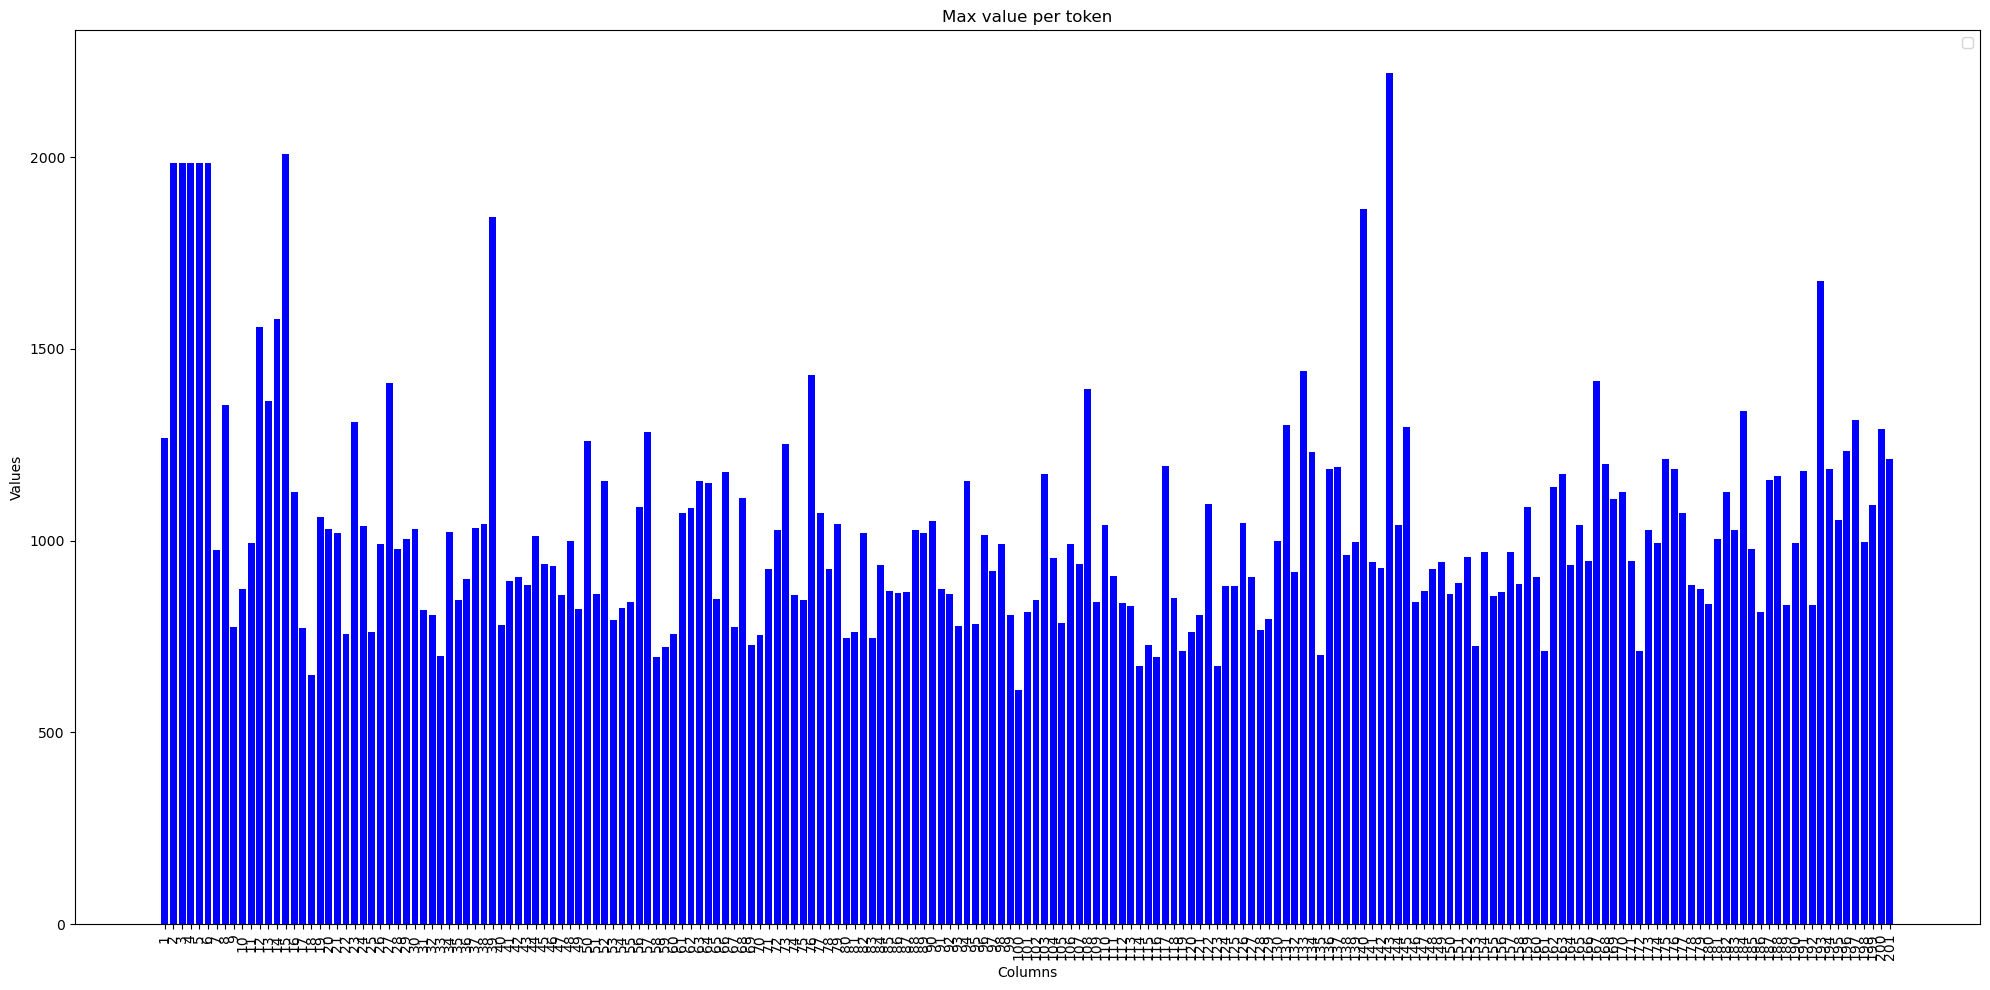

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 첫 번째 CSV 파일 경로
epoch = 43
mode = 'max'
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_{mode}'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_white_patch_init_register_CC_fp16/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# m번째 row 선택
m =150  # 원하는 row 인덱스 설정 (0부터 시작)
x_labels1 = [f"{i}" for i in range(1, k1+1)]
x_values1 = list(range(1, k1+1))
row_values1 = data1.iloc[m, :k1]

# 첫 번째 데이터 바 그래프
plt.figure(figsize=(20, 10))
plt.bar(x_values1, row_values1, color='blue')

# 그래프 라벨 및 범례
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title(f"Max value per token")
plt.legend(loc='upper right')
plt.xticks(x_values1, rotation=90)

# 그래프 출력
plt.tight_layout()
plt.show()


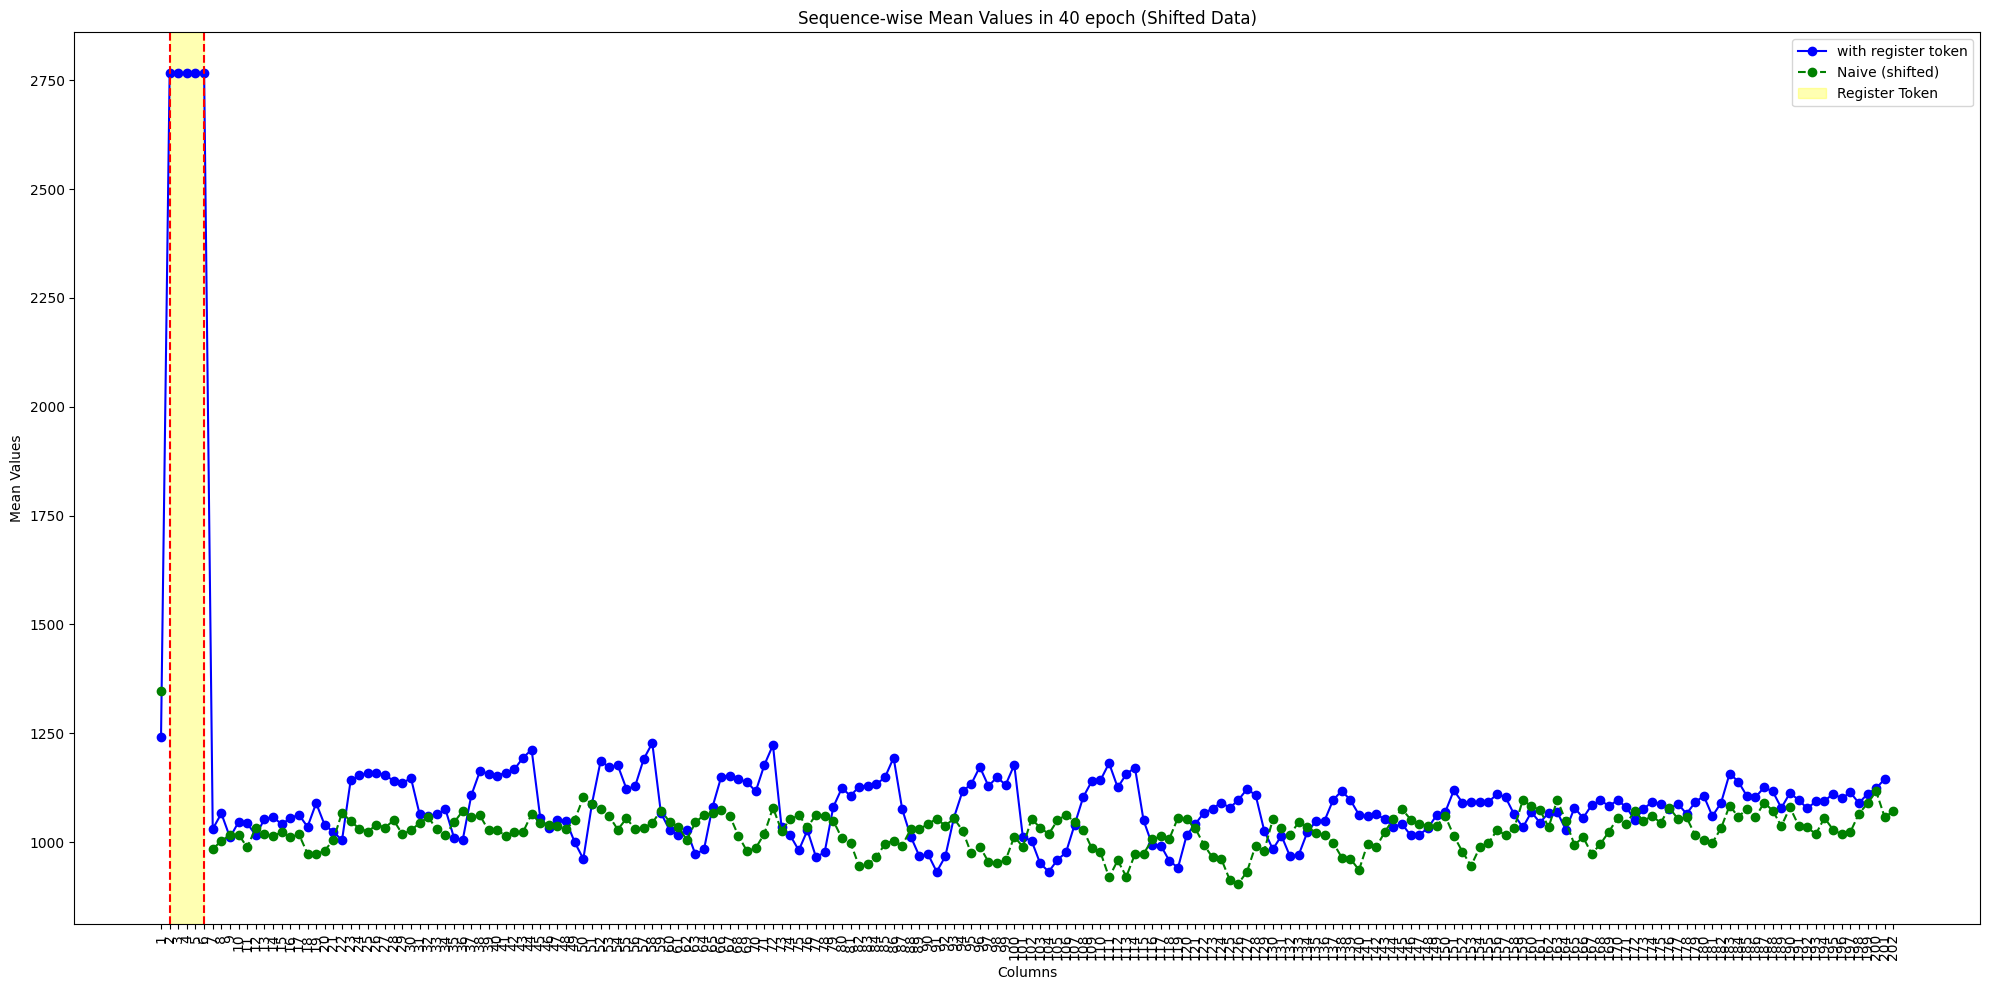

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 첫 번째 CSV 파일 경로
epoch = 40
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_one_CC_fp16/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# 첫 번째 데이터 X축 정의 및 평균 계산
x_labels1 = [f"{i}" for i in range(1, k1+1)]
x_values1 = list(range(1, k1+1))
column_means1 = data1.iloc[:, :k1].mean(axis=0)

# 두 번째 CSV 파일 경로
file_name2 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1_max'
file_path2 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name2}.csv'
data2 = pd.read_csv(file_path2)
k2 = 197

# 두 번째 데이터 X축 정의 및 평균 계산
x_labels2 = [f"{i}" for i in range(1, k2+1)]
x_values2 = list(range(1, k2+1))
column_means2 = data2.iloc[:, :k2].mean(axis=0)

# 두 번째 데이터의 첫 번째 열은 유지하고 나머지 열은 shift
shift_amount = 5
column_means2_shifted = list(column_means2[:1]) + [np.nan] * shift_amount + list(column_means2[1:])  # 첫 번째 열 유지 후 나머지 shift
x_values2_shifted = list(range(1, len(column_means2_shifted) + 1))  # X축 값을 Y축 데이터 길이에 맞게 확장

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 데이터 플롯
plt.plot(x_values1, column_means1, marker='o', linestyle='-', color='blue', label='with register token')

# 두 번째 데이터 플롯 (shift된 값 표시)
plt.plot(x_values2_shifted, column_means2_shifted, marker='o', linestyle='--', color='green', label='Naive (shifted)')

# X축 범위 강조 (2~6 영역)
plt.axvline(x=2, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=6, color='red', linestyle='--', linewidth=1.5)
plt.axvspan(2, 6, color='yellow', alpha=0.3, label='Register Token')

# 그래프 라벨 및 범례
plt.xlabel("Columns")
plt.ylabel("Mean Values")
plt.title(f"Sequence-wise Mean Values in {epoch} epoch (Shifted Data)")
plt.xticks(x_values2_shifted, rotation=90)
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


Processing epoch 70...


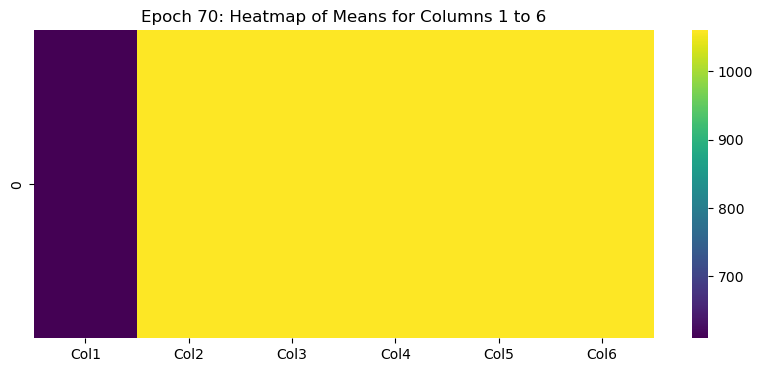

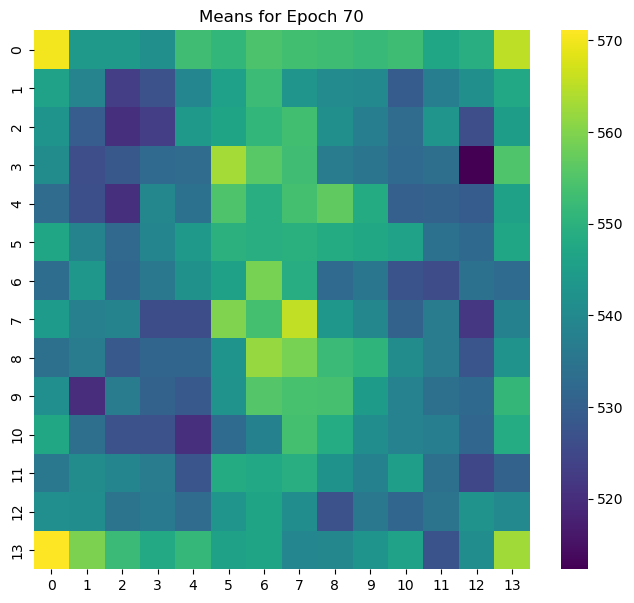

Processing epoch 71...


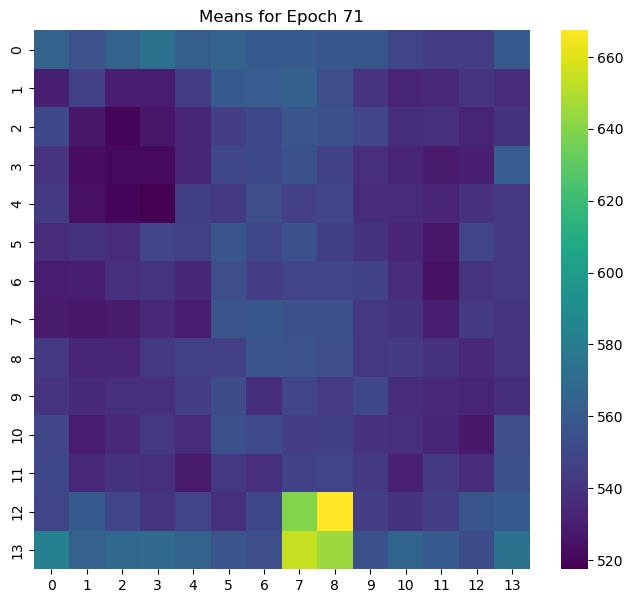

Processing epoch 72...


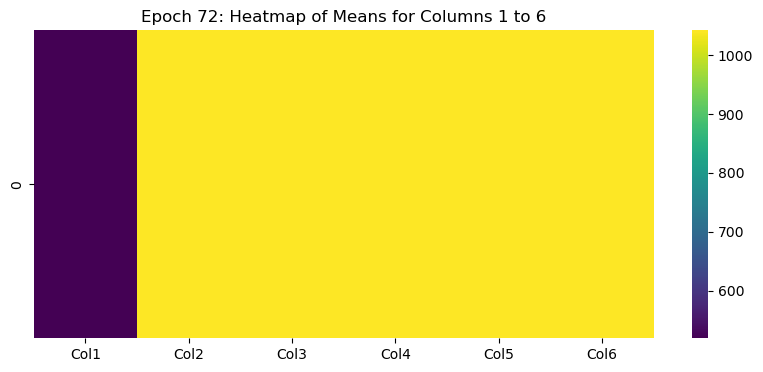

Processing epoch 73...


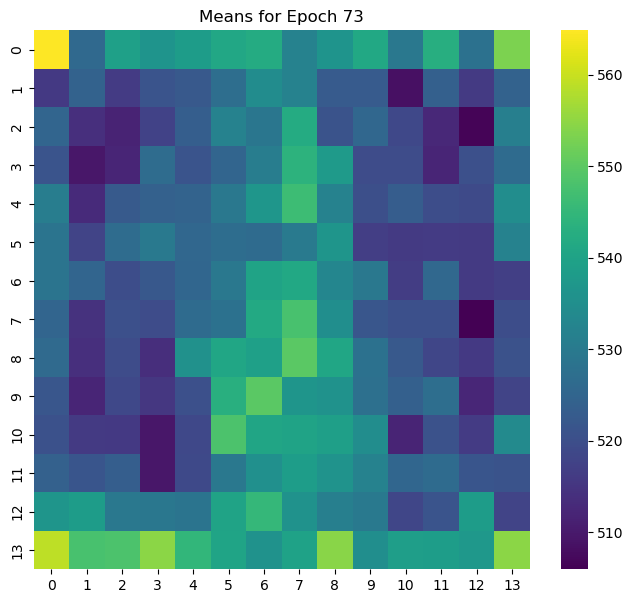

Processing epoch 74...


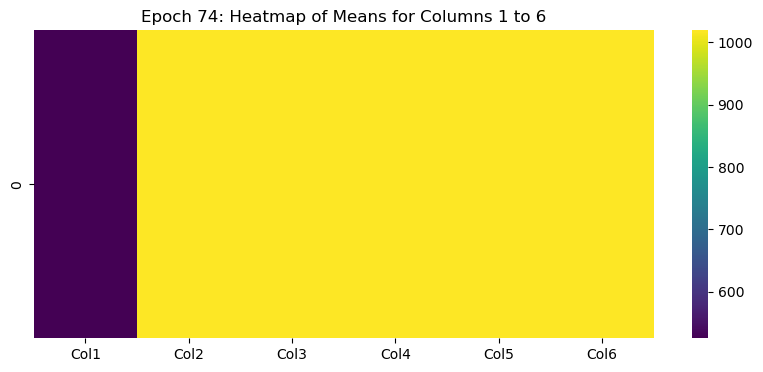

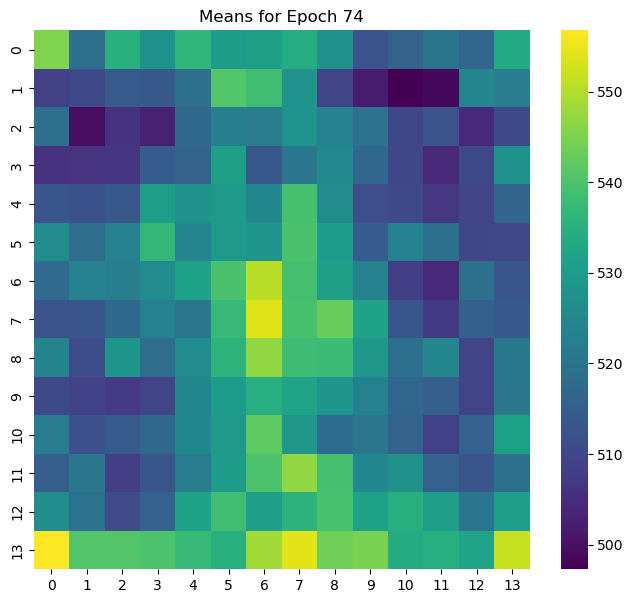

Processing epoch 75...


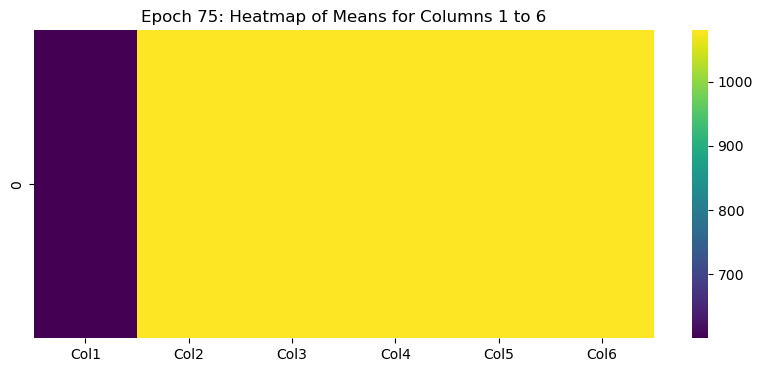

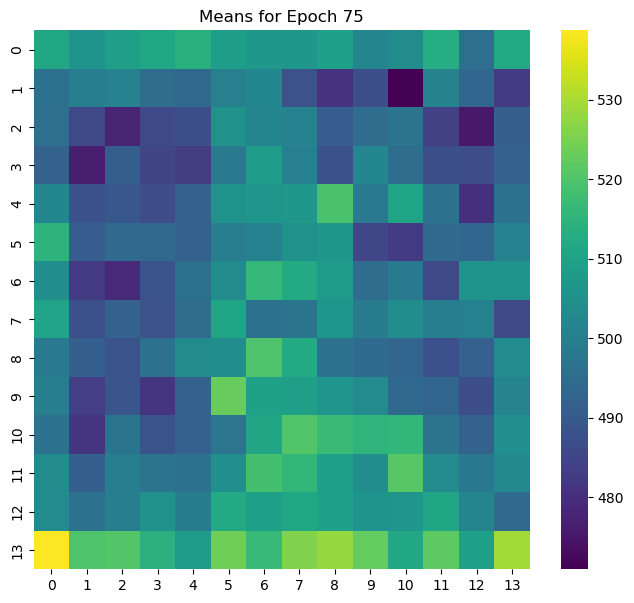

Processing epoch 76...


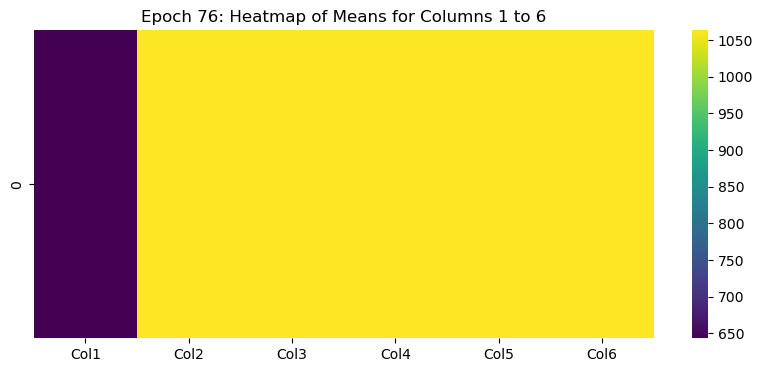

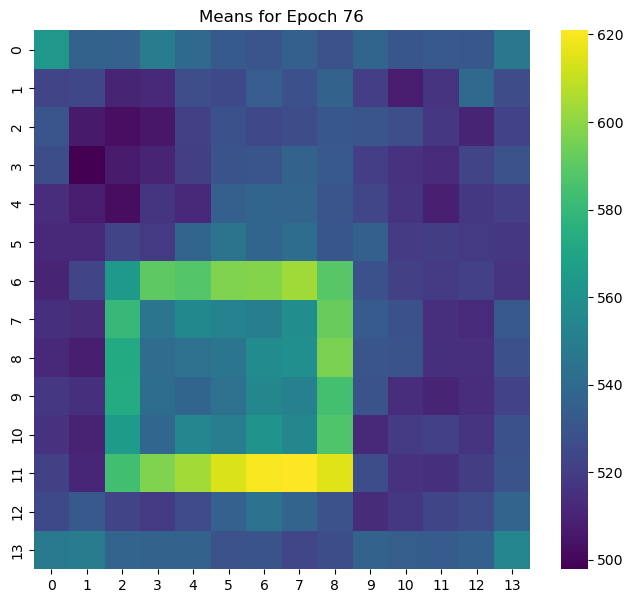

Processing epoch 77...


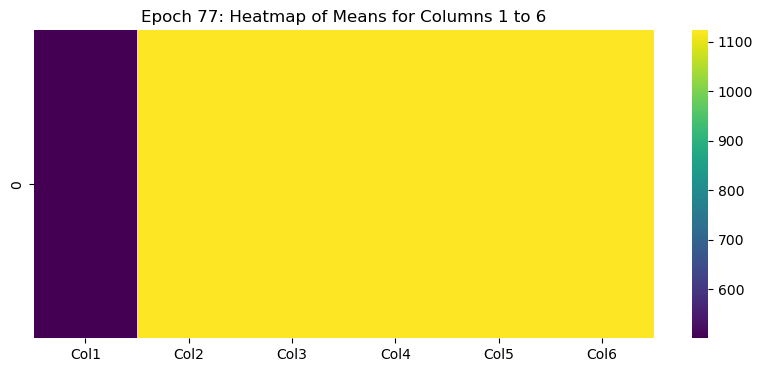

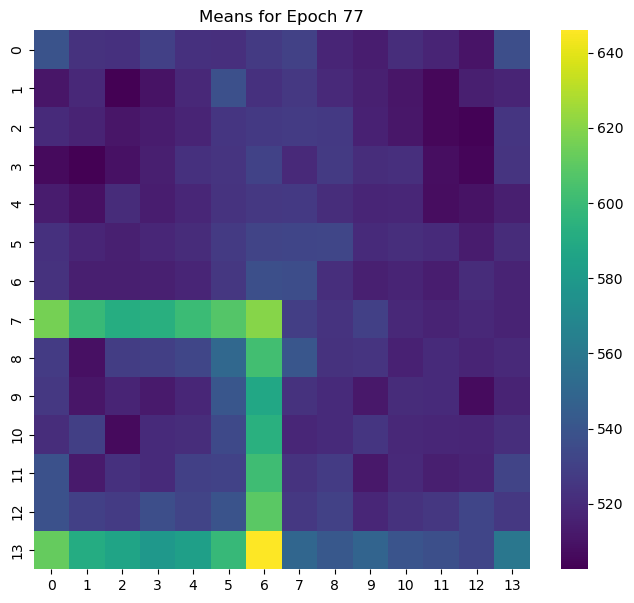

Processing epoch 78...


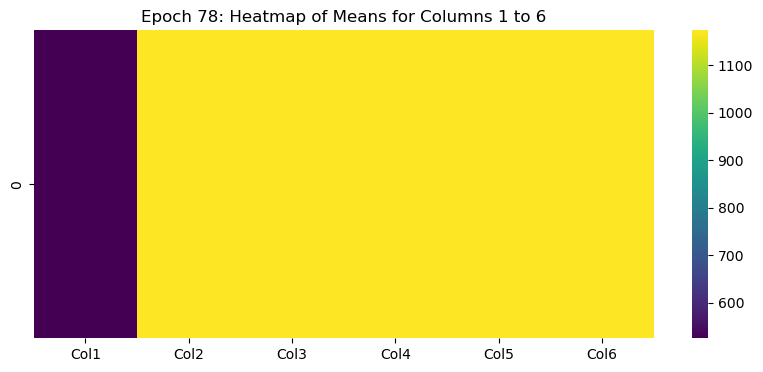

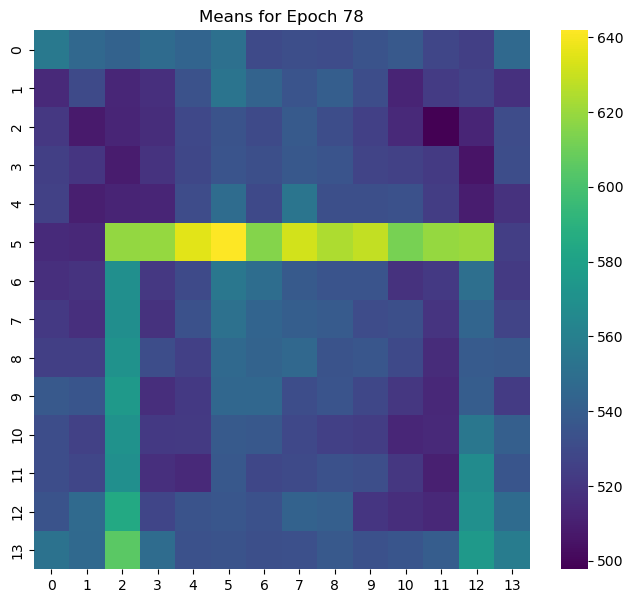

Processing epoch 79...


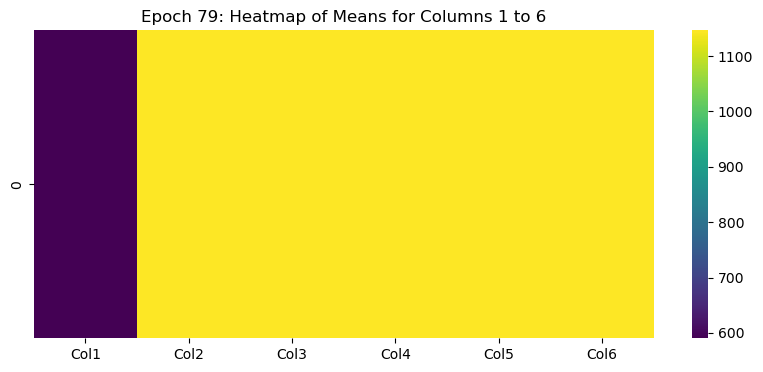

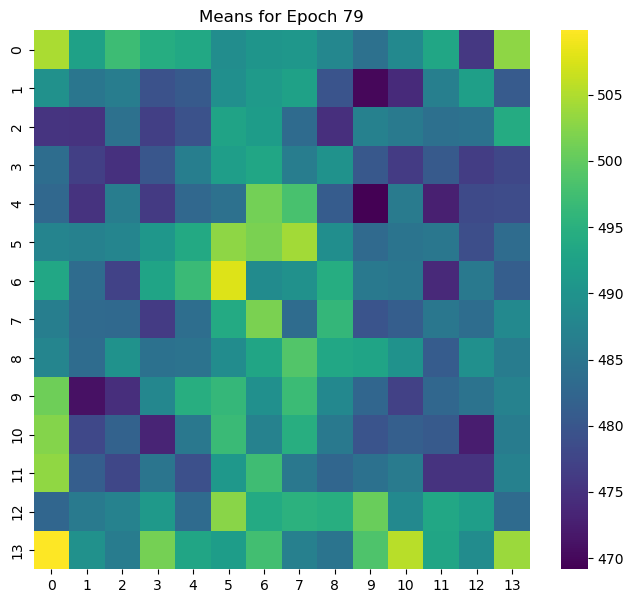

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


block_num = 4

# 공통 함수 정의
def plot_heatmap(data, title, figsize):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=False, cmap="viridis", cbar=True)
    plt.title(title)
    plt.show()

def process_and_plot(epoch):
    # 파일 경로 설정
    file_name = f'block_{block_num}_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
    file_path = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_white_patch_init_register_CC_fp16/Hidden_State/{file_name}.csv'
    
    # 데이터 로드
    data = pd.read_csv(file_path)
    
    # 데이터 범위 나누기
    subset1 = data.iloc[:, :6]  # col 1부터 6까지
    subset2 = data.iloc[:, 6:202]  # col 7부터 202까지

    # subset1 평균 계산
    subset1_means = subset1.mean(axis=0).to_frame().T

    # subset2 평균 계산 및 14x14 reshape
    if subset2.shape[1] == 196:  # 196개의 토큰인지 확인
        subset2_means = subset2.mean(axis=0).values
        subset2_means = subset2_means.flatten()
        subset2_means = subset2_means.reshape(14, 14)
    else:
        raise ValueError("The number of columns for subset2 is not 196. Check the data!")

    # 히트맵 그리기
    plot_heatmap(subset1_means, f"Epoch {epoch}: Heatmap of Means for Columns 1 to 6", (10, 4))
    plot_heatmap(subset2_means, f"Means for Epoch {epoch}", (8, 7))

# 10부터 19까지 각 에폭에 대해 실행
for epoch in range(70, 80):
    print(f"Processing epoch {epoch}...")
    process_and_plot(epoch)

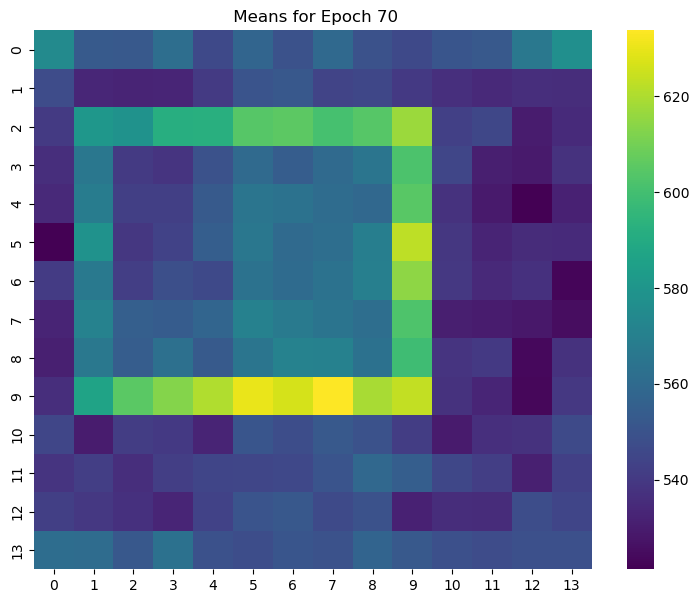

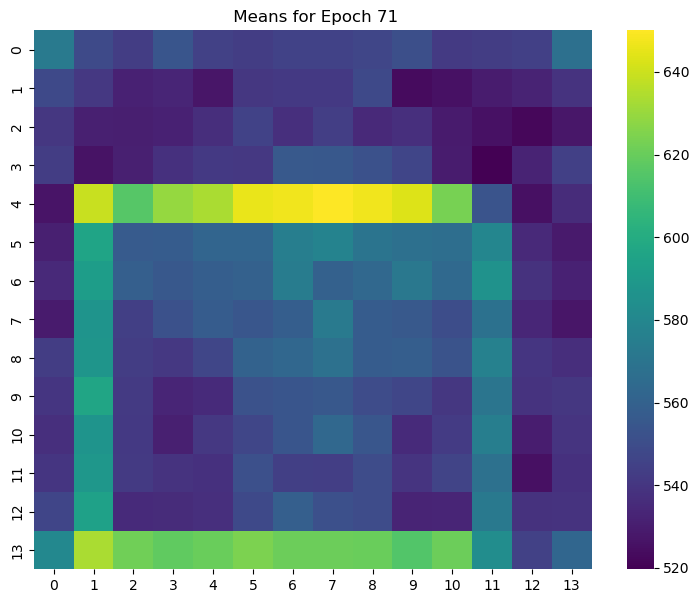

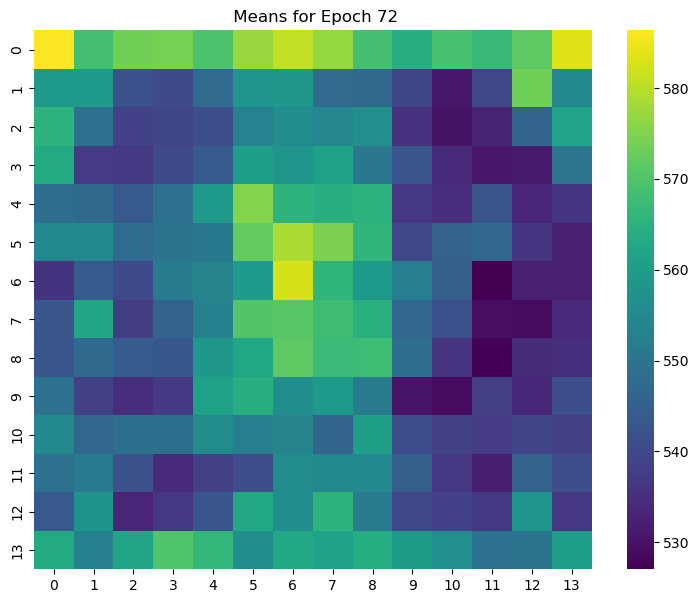

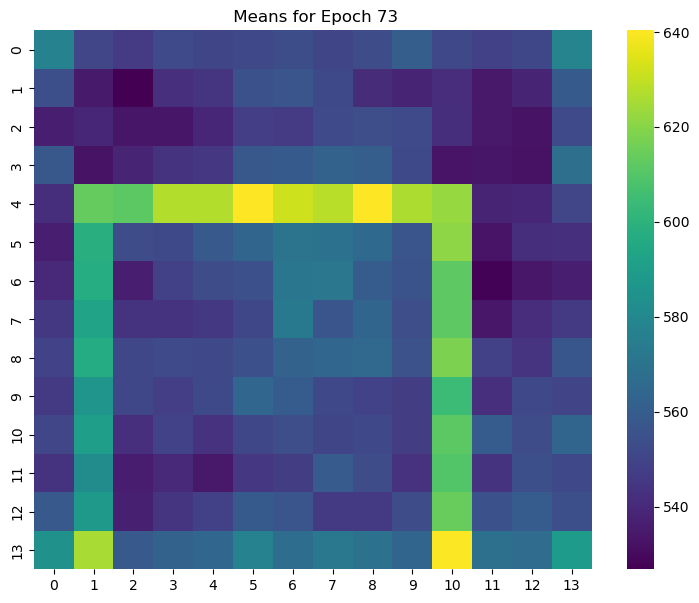

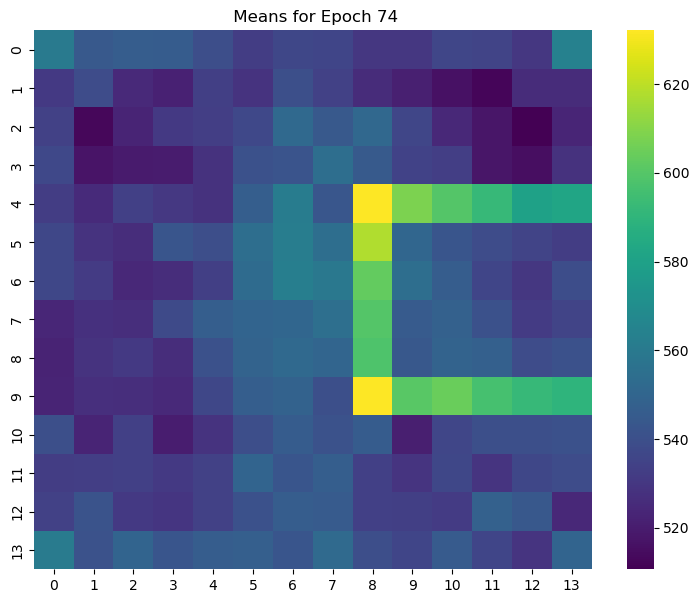

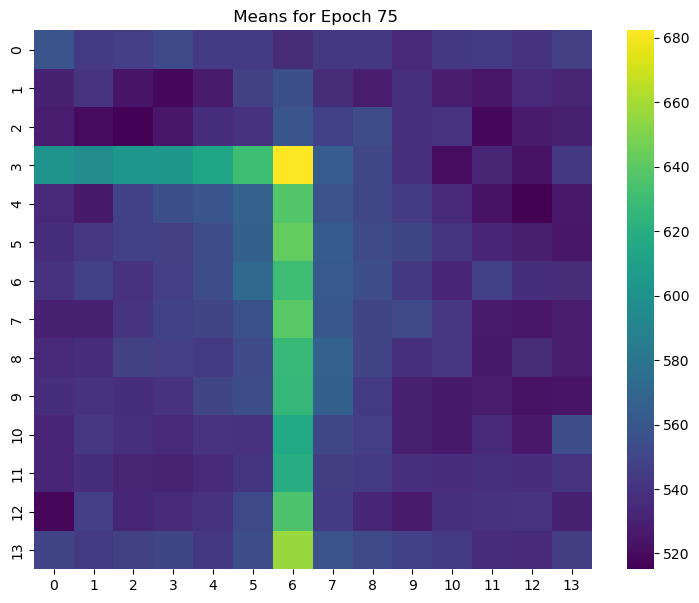

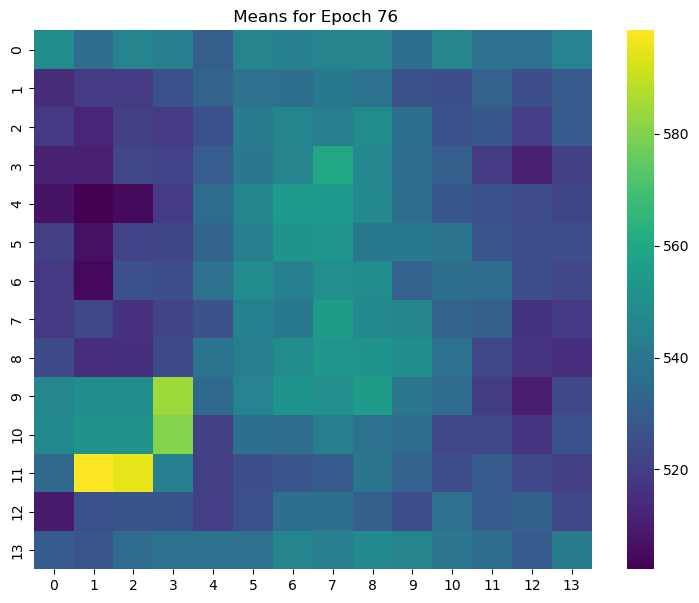

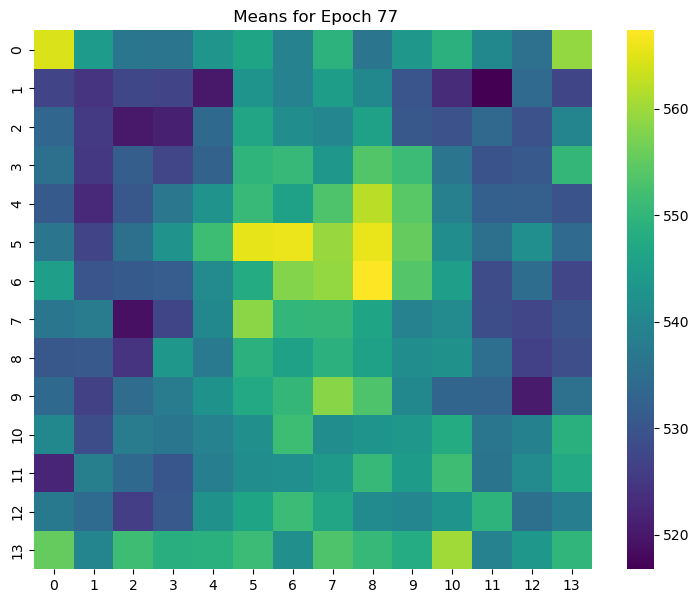

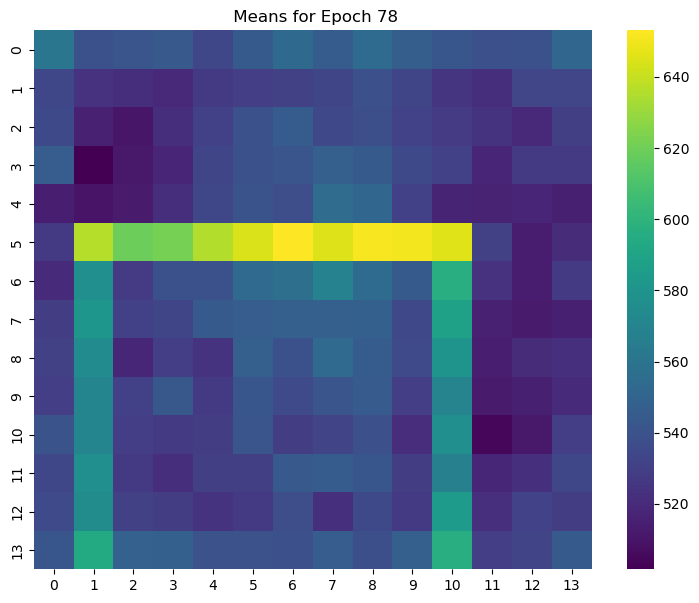

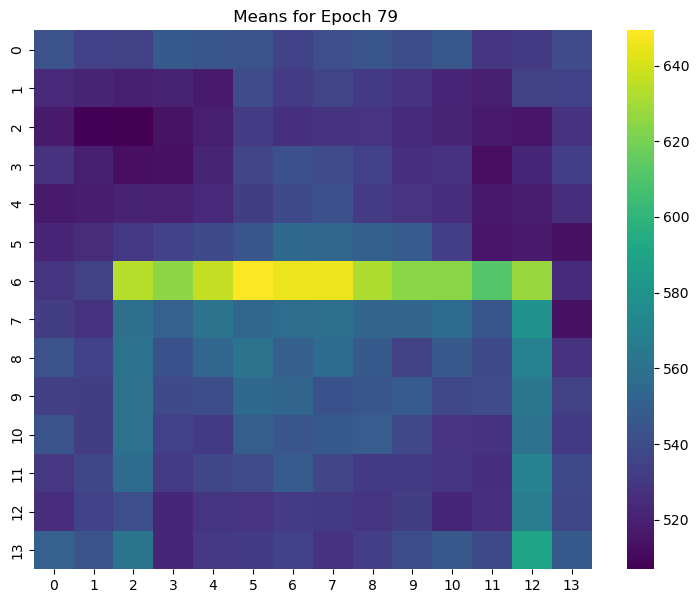

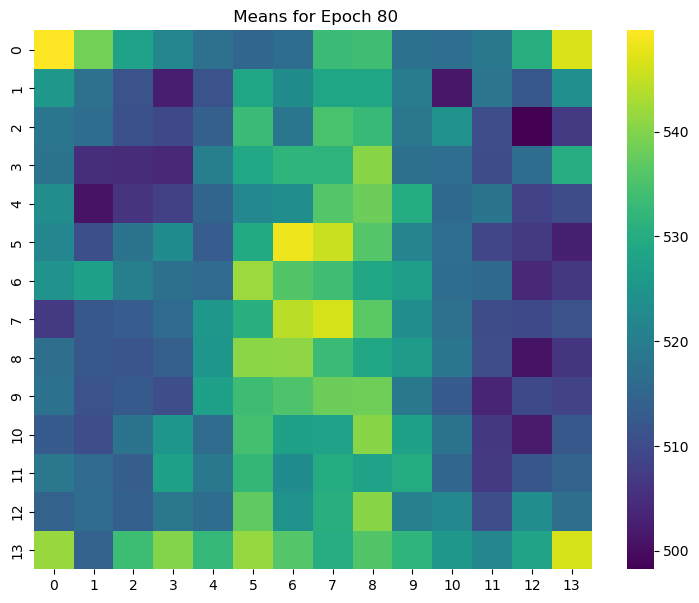

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 히트맵 생성 함수
def plot_heatmap(data, title, figsize):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=False, cmap="viridis", cbar=True)
    plt.title(title)
    plt.show()

block_num = 4

# 에폭 범위 설정
start_epoch = 70
end_epoch = 80

# 파일 경로 설정 및 히트맵 생성 반복
for epoch in range(start_epoch, end_epoch + 1):
    file_name = f'block_{block_num}_layer_Hidden_State_epoch_{epoch}_iteration_1_max'
    file_path = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name}.csv'

    # 데이터 읽기
    data = pd.read_csv(file_path)

    # 데이터 범위 나누기
    subset1 = data.iloc[:, :0]  # 필요 시 수정
    subset2 = data.iloc[:, 1:197]  # col 7부터 202까지

    # subset2 평균 계산 및 14x14 reshape
    if subset2.shape[1] == 196:  # 196개의 토큰인지 확인
        subset2_means = subset2.mean(axis=0).values
        subset2_means = subset2_means.flatten()
        subset2_means = subset2_means.reshape(14, 14)
    else:
        raise ValueError(f"The number of columns for subset2 is not 196 in epoch {epoch}. Check the data!")

    # 히트맵 그리기
    plot_heatmap(subset2_means, f" Means for Epoch {epoch}", (9, 7))


(256, 6)
(256, 196)
(196,)
<class 'numpy.ndarray'>


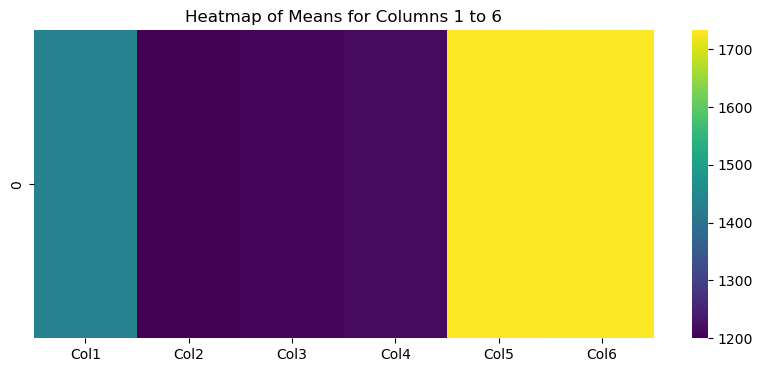

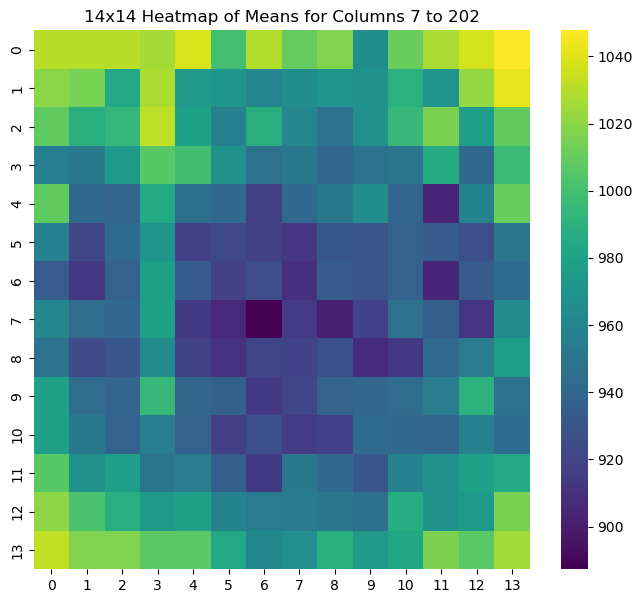

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 첫 번째 CSV 파일 경로
epoch = 43
file_name1 = f'block_11_layer_Hidden_State_epoch_{epoch}_iteration_1250_max'
file_path1 = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_rand_init_register_CC_fp16/Hidden_State/{file_name1}.csv'
data1 = pd.read_csv(file_path1)
k1 = 201

# 첫 번째 데이터 범위 나누기
subset1 = data1.iloc[:, :6]  # col 1부터 6까지
subset2 = data1.iloc[:, 6:202]  # col 7부터 202까지

# 첫 번째 subset 평균 계산 및 히트맵
def plot_heatmap(data, title, figsize):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=False, cmap="viridis", cbar=True)
    plt.title(title)
    plt.show()

# subset1 평균 계산
subset1_means = subset1.mean(axis=0).to_frame().T

# subset2 평균 계산 및 16x16 reshape
print(subset1.shape)
print(subset2.shape)
if subset2.shape[1] == 196:  # 196개의 토큰인지 확인
    subset2_means = subset2.mean(axis=0).values
    subset2_means = subset2_means.flatten()

    print(subset2_means.shape)
    print(type(subset2_means))  # NumPy 배열인지 확인

    subset2_means = subset2_means.reshape(14,14)
else:
    raise ValueError("The number of columns for subset2 is not 196. Check the data!")

# 히트맵 그리기
plot_heatmap(subset1_means, "Heatmap of Means for Columns 1 to 6", (10, 4))
plot_heatmap(subset2_means, "14x14 Heatmap of Means for Columns 7 to 202", (8, 7))


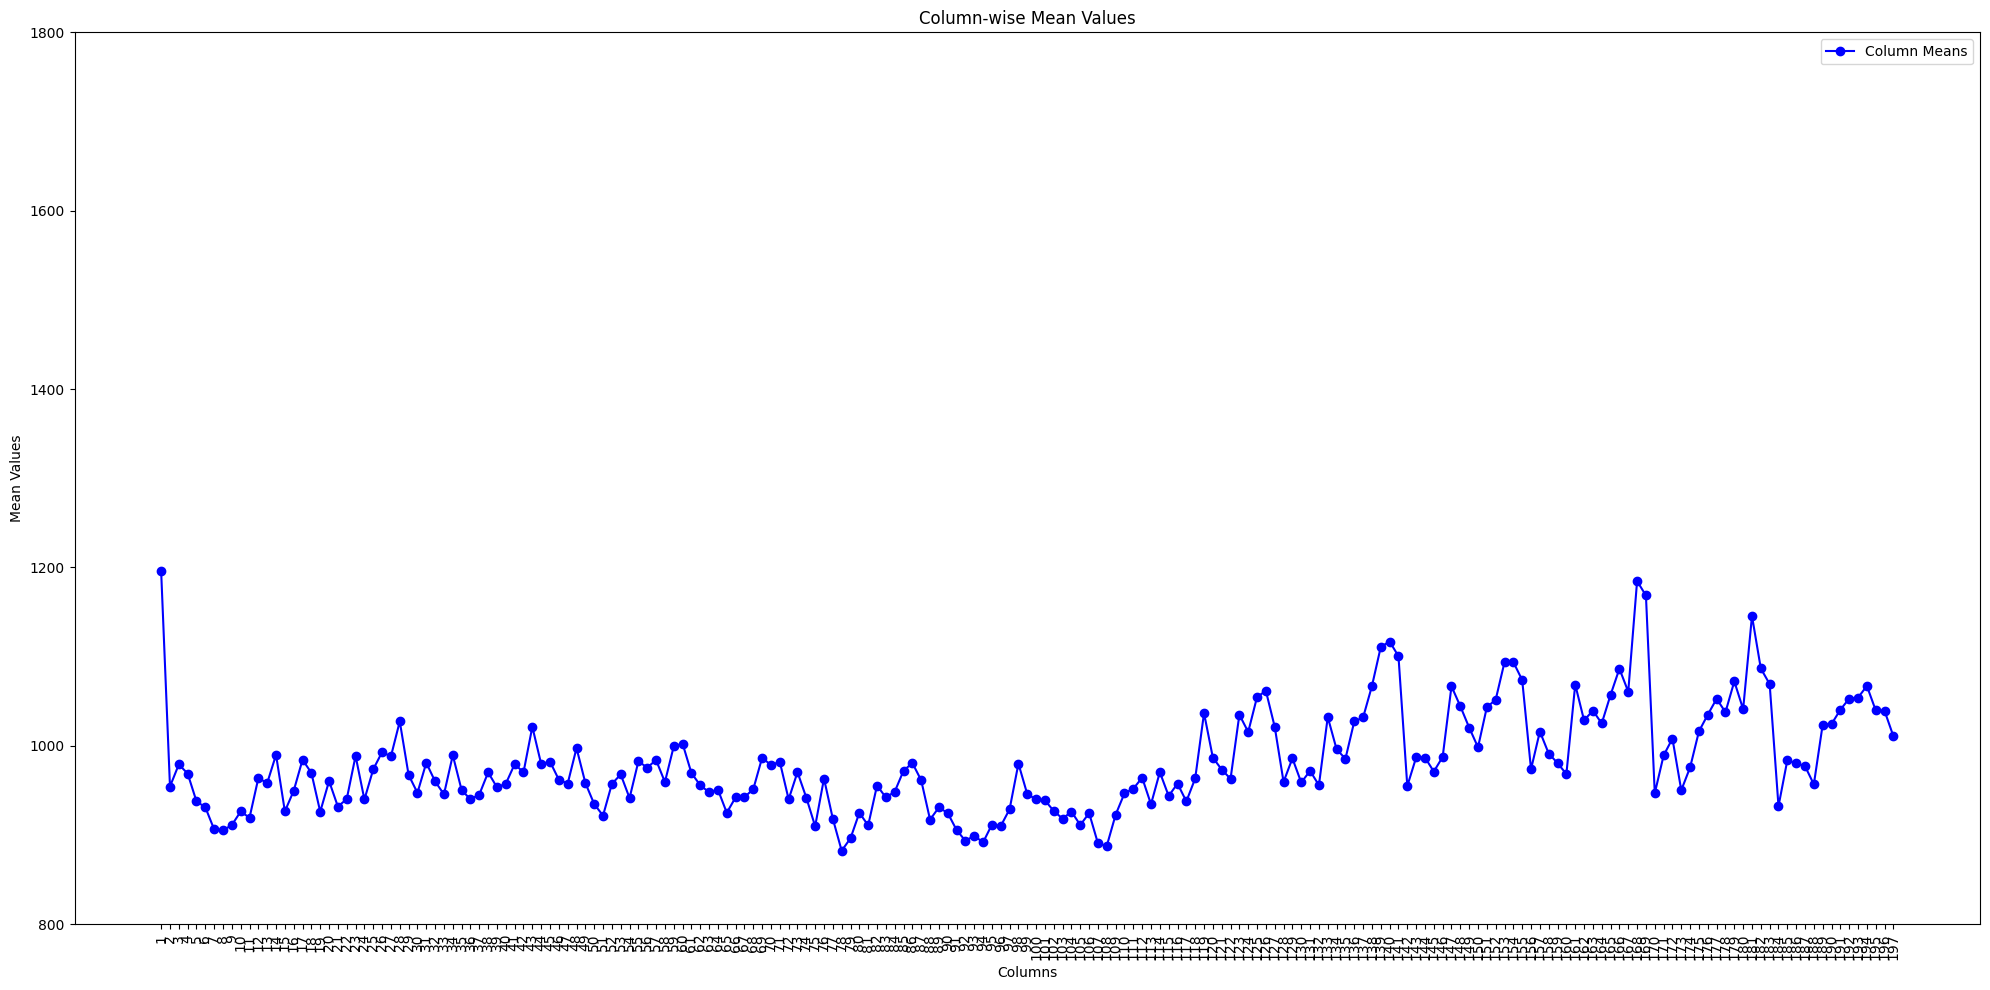

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_name = 'block_11_layer_Hidden_State_epoch_43_iteration_1_max'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted_finegrained_wgfp_qkl_fp16/Hidden_State/{file_name}.csv'
data = pd.read_csv(file_path)
k = 197

# X축 라벨 정의 (Col1 ~ Col201)
x_labels = [f"{i}" for i in range(1, k+1)]
x_values = list(range(1, k+1))

# 각 열의 평균 계산
column_means = data.iloc[:, :k].mean(axis=0)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 평균 값 플롯
plt.plot(x_values, column_means, marker='o', linestyle='-', color='blue', label='Column Means')

# X = Col6 (X값 6) 기준으로 수직선 추가


plt.ylim(800, 1800)
# 그래프에 라벨 추가
plt.xlabel("Columns")
plt.ylabel("Mean Values")
plt.title("Column-wise Mean Values")
plt.xticks(x_values, x_labels, rotation=90)
plt.legend(loc='upper right')

# 그래프 출력
plt.tight_layout()
plt.show()


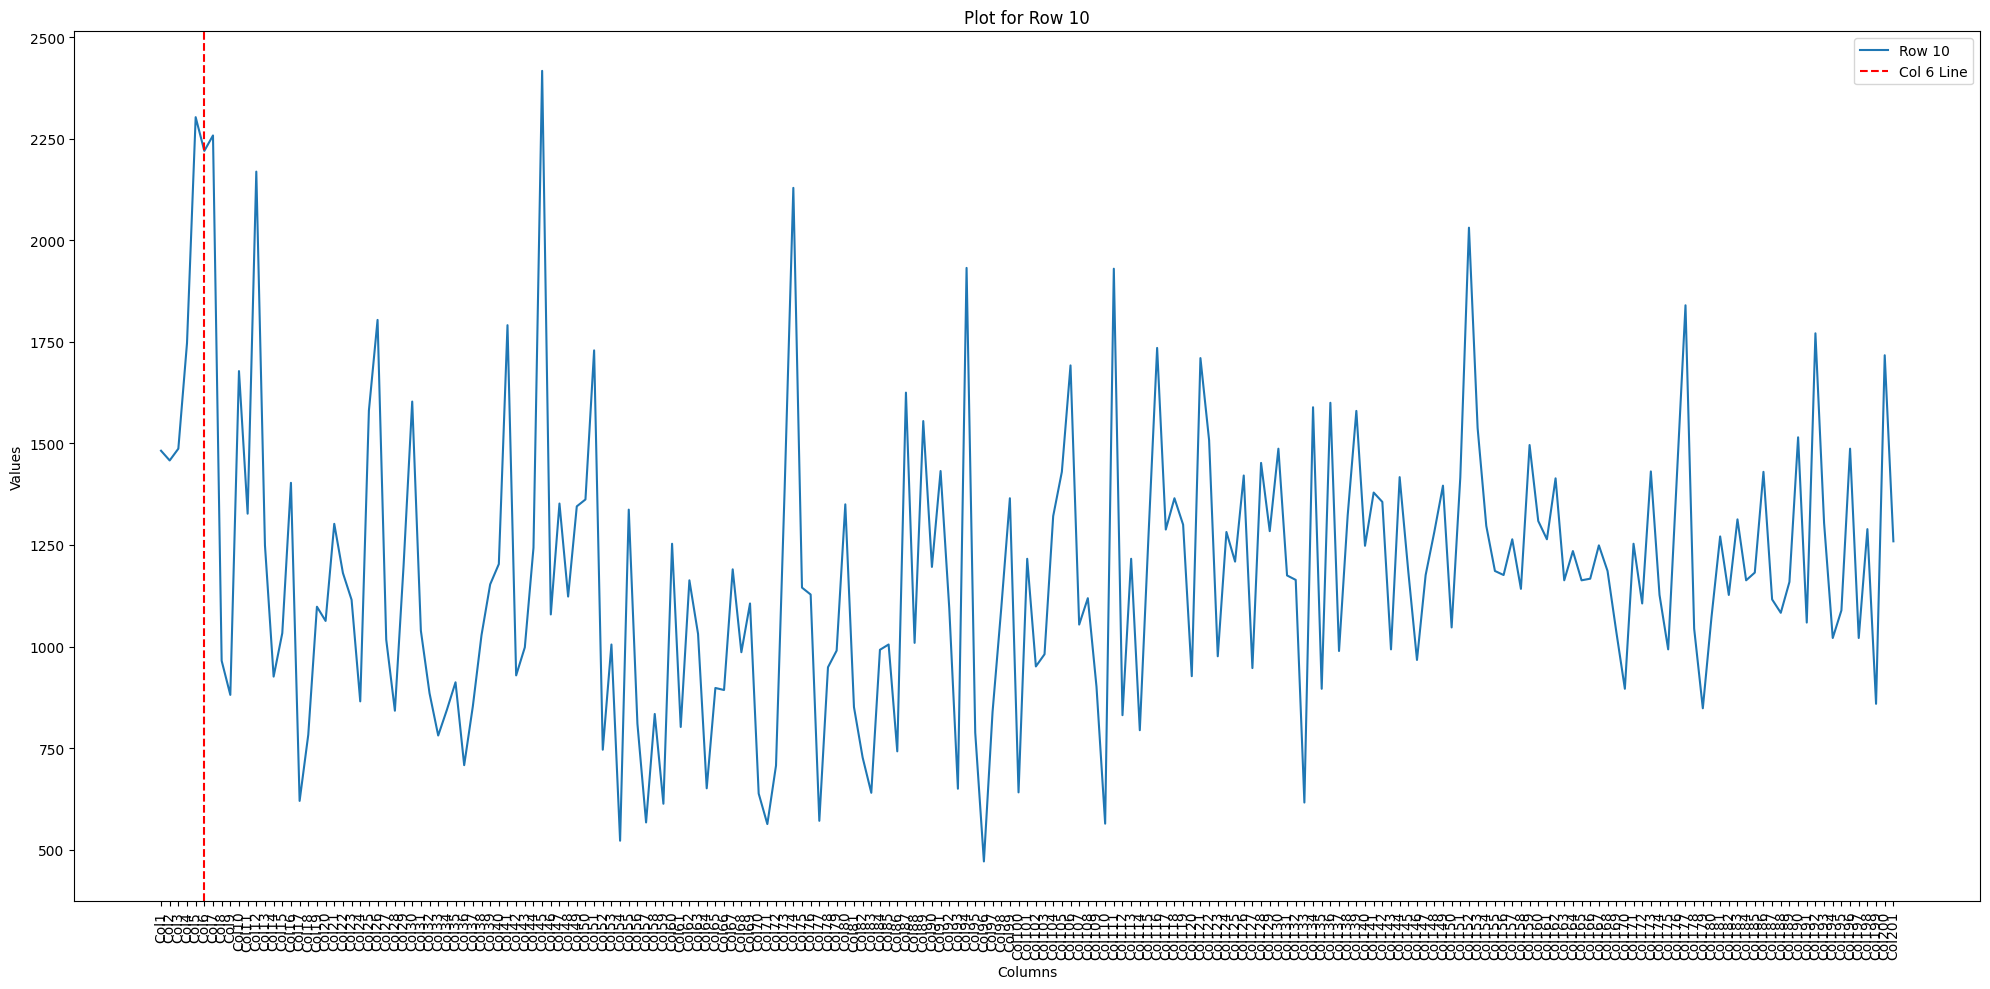

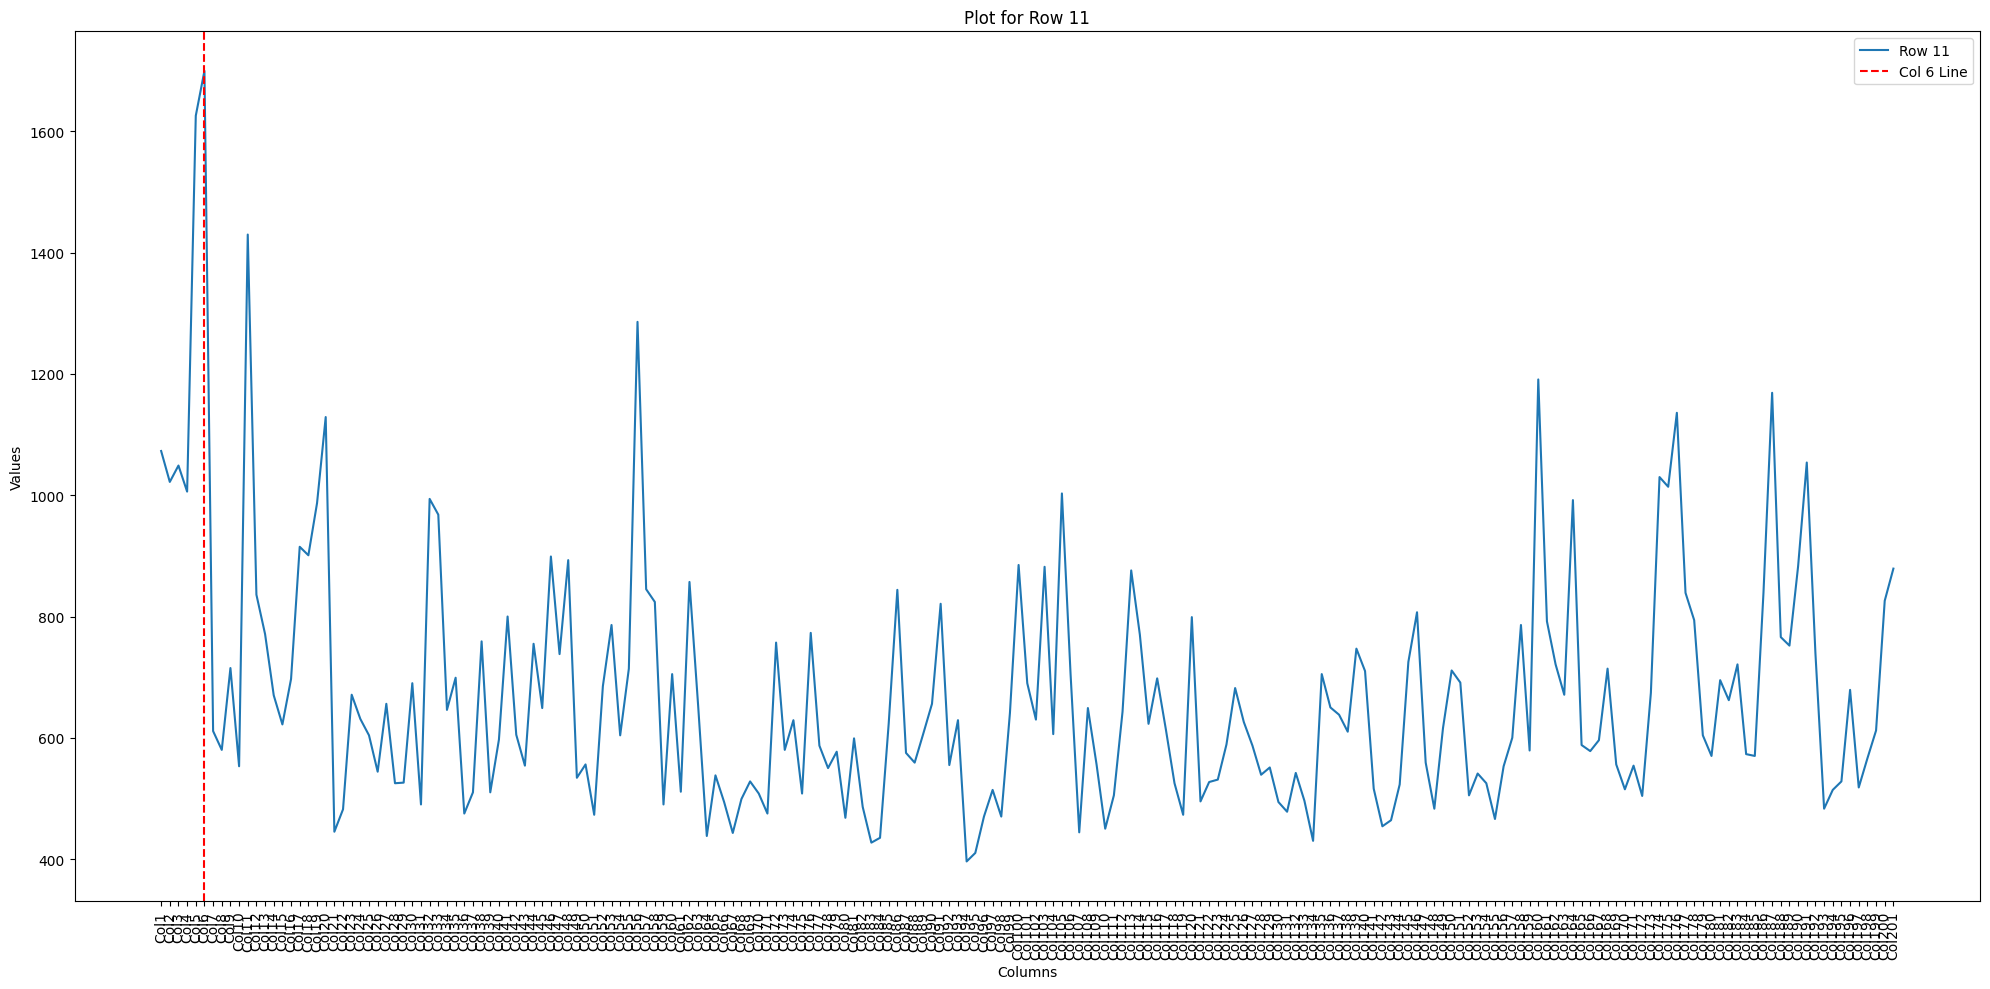

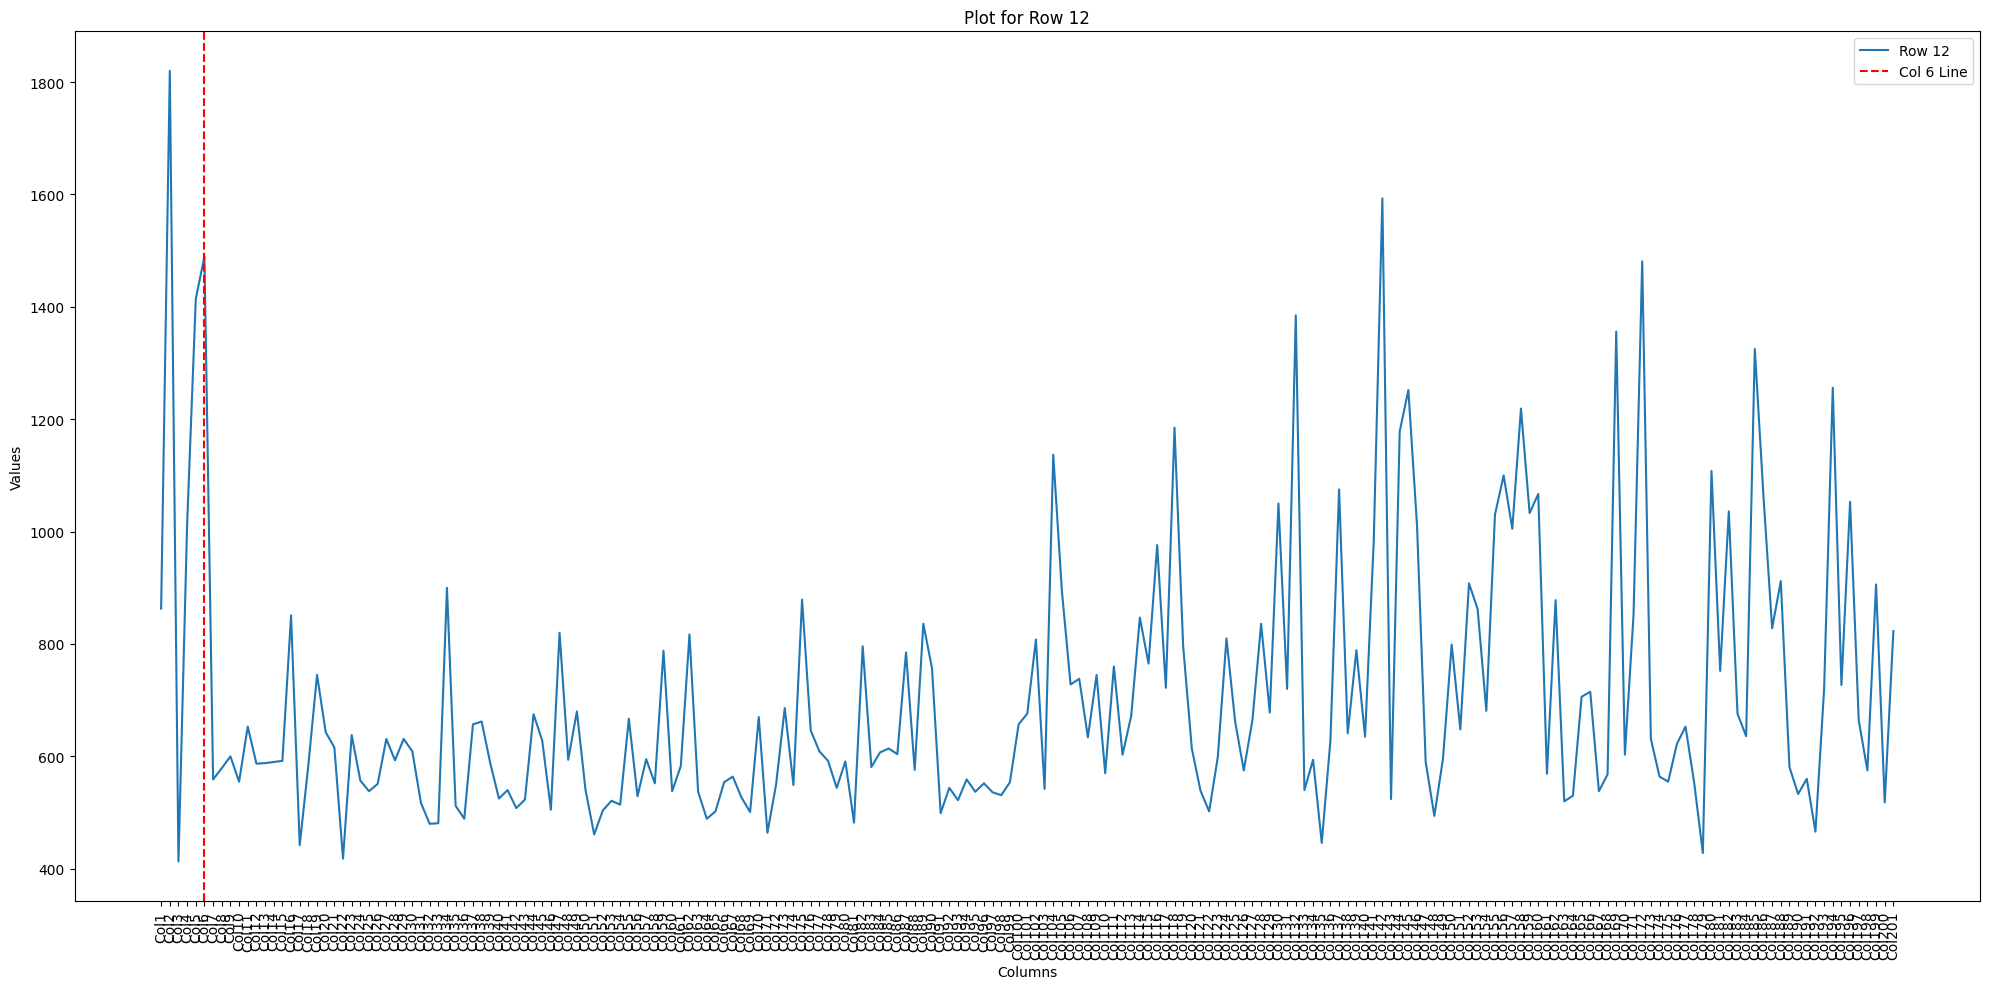

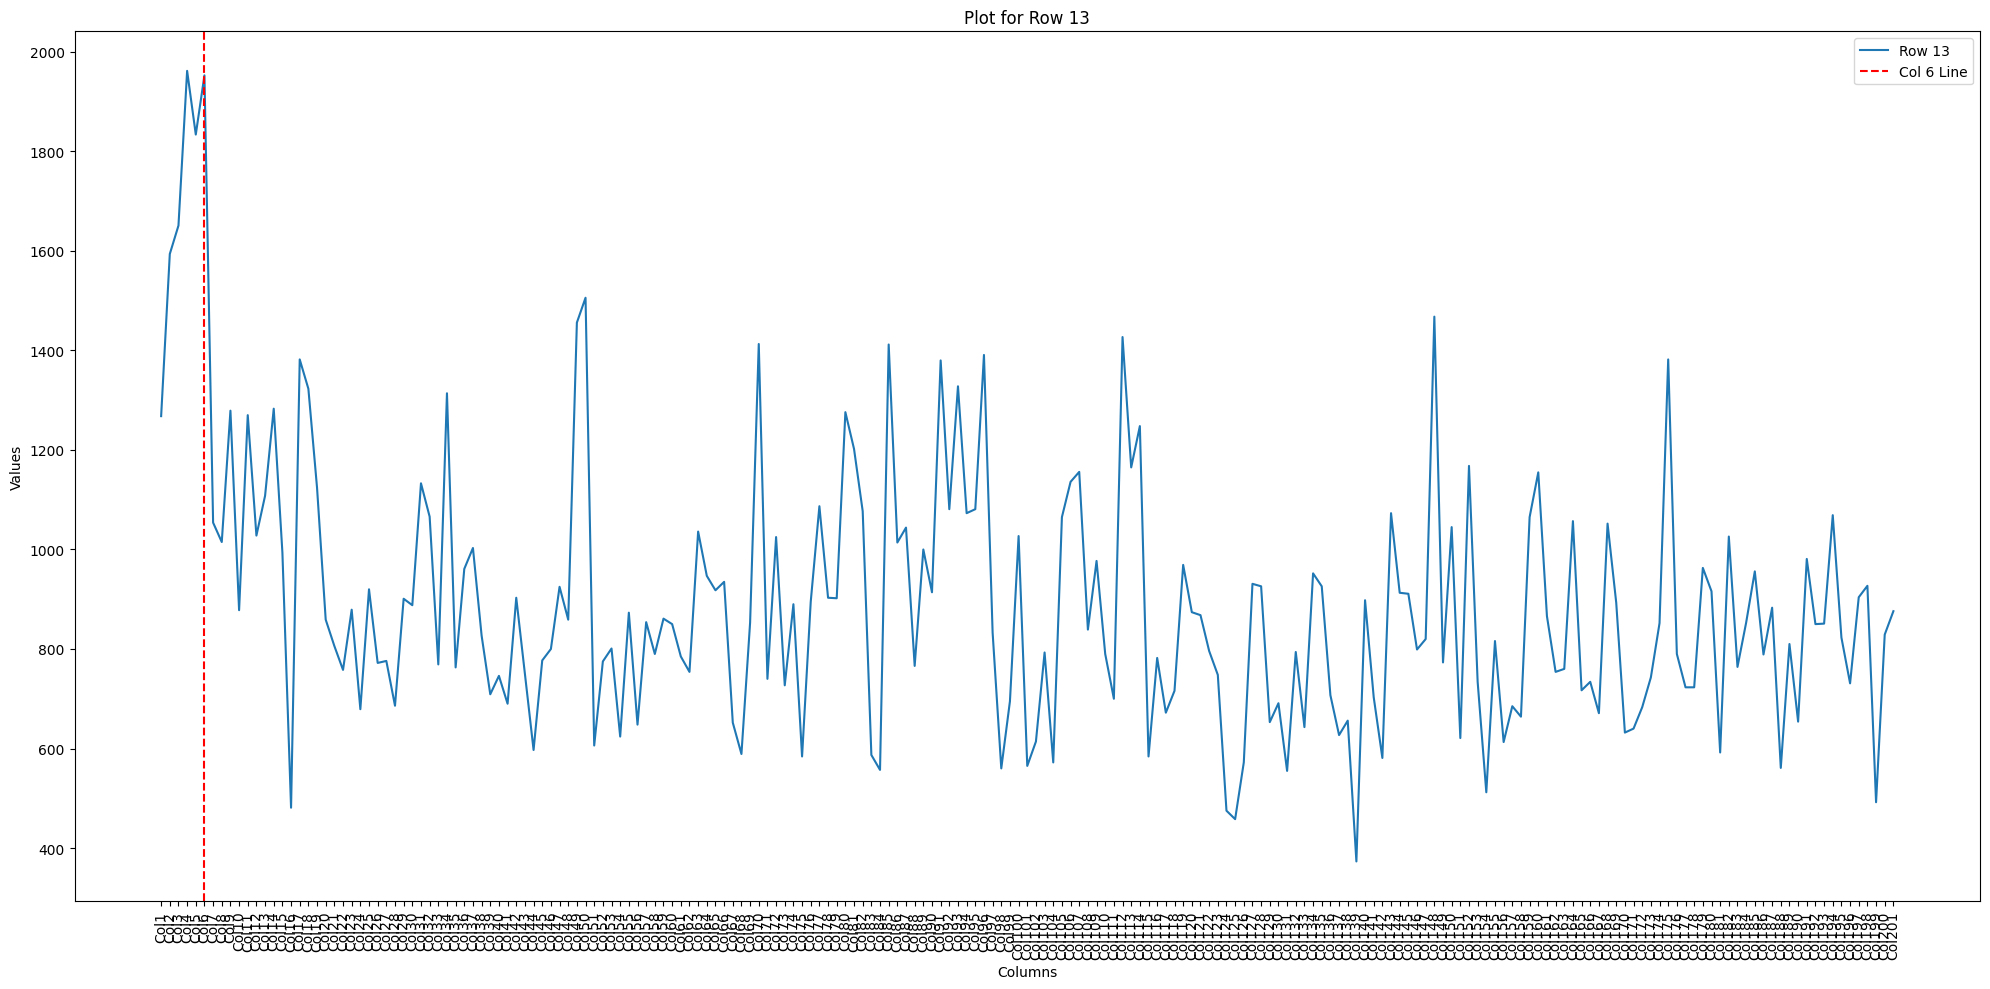

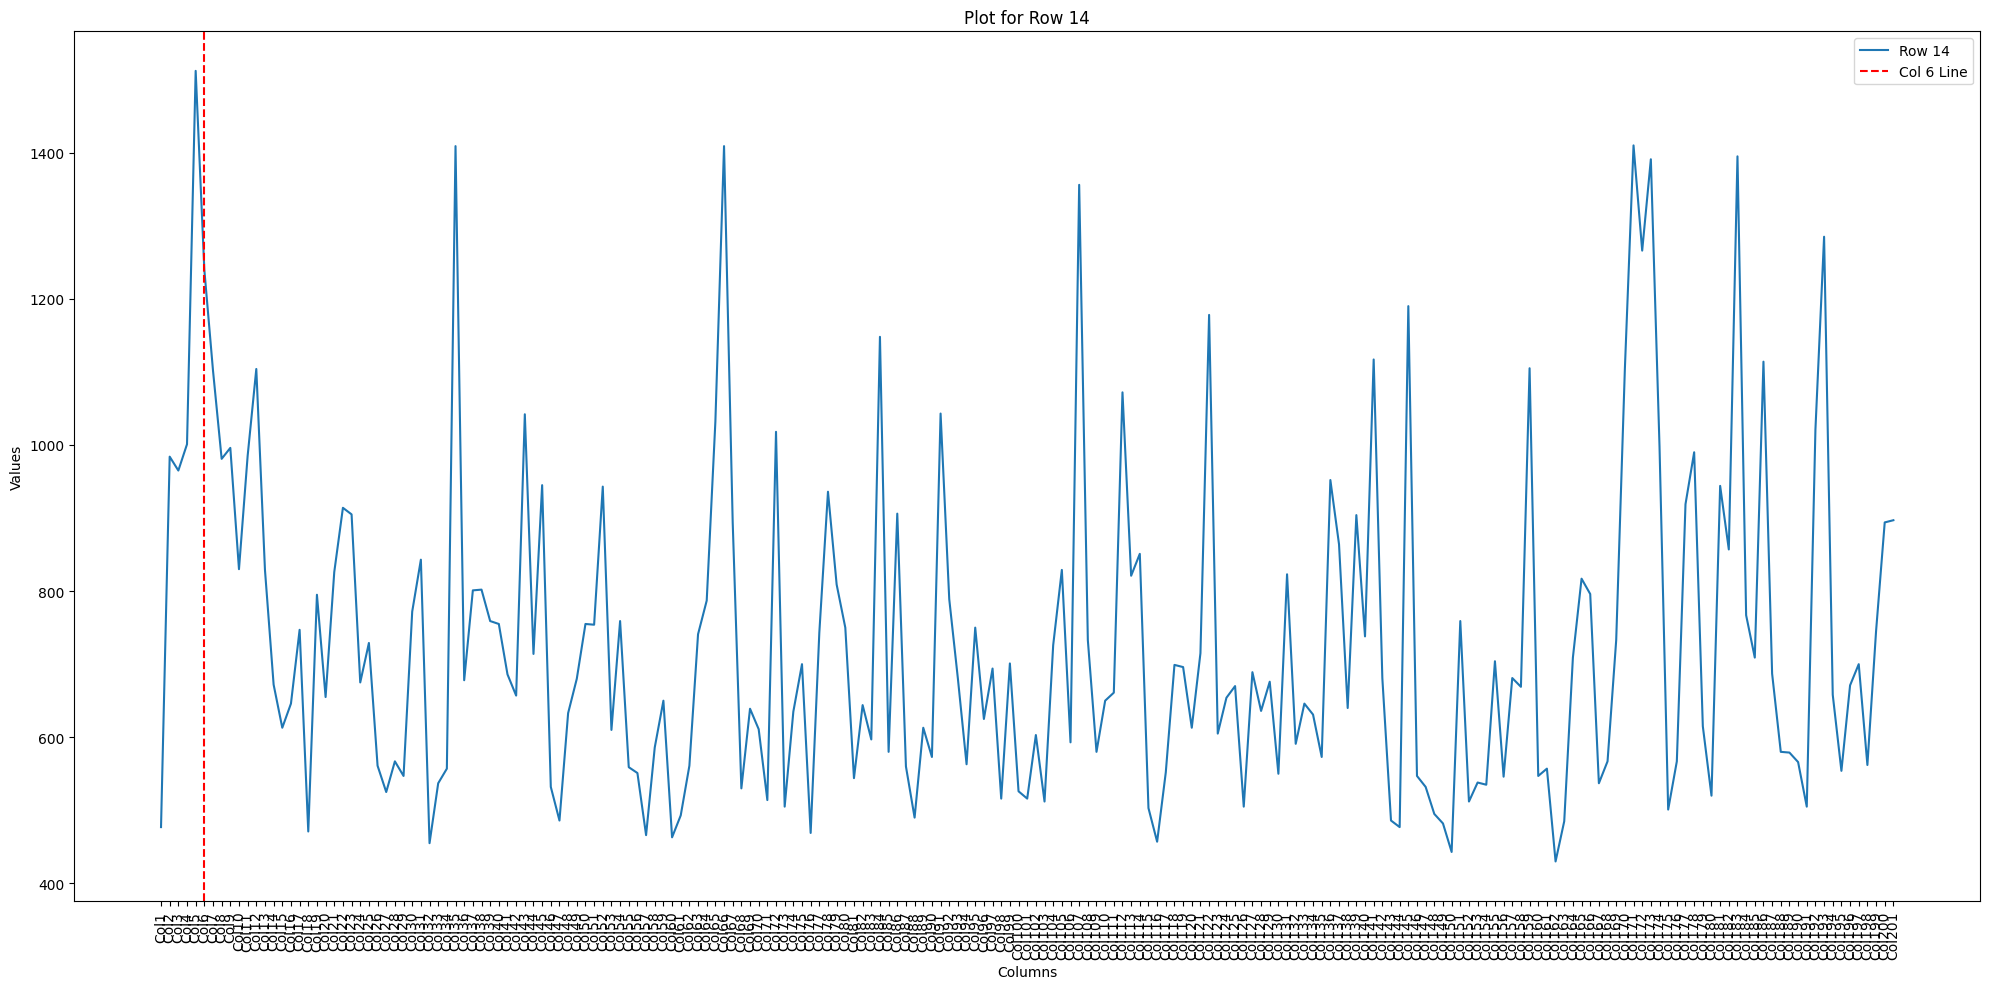

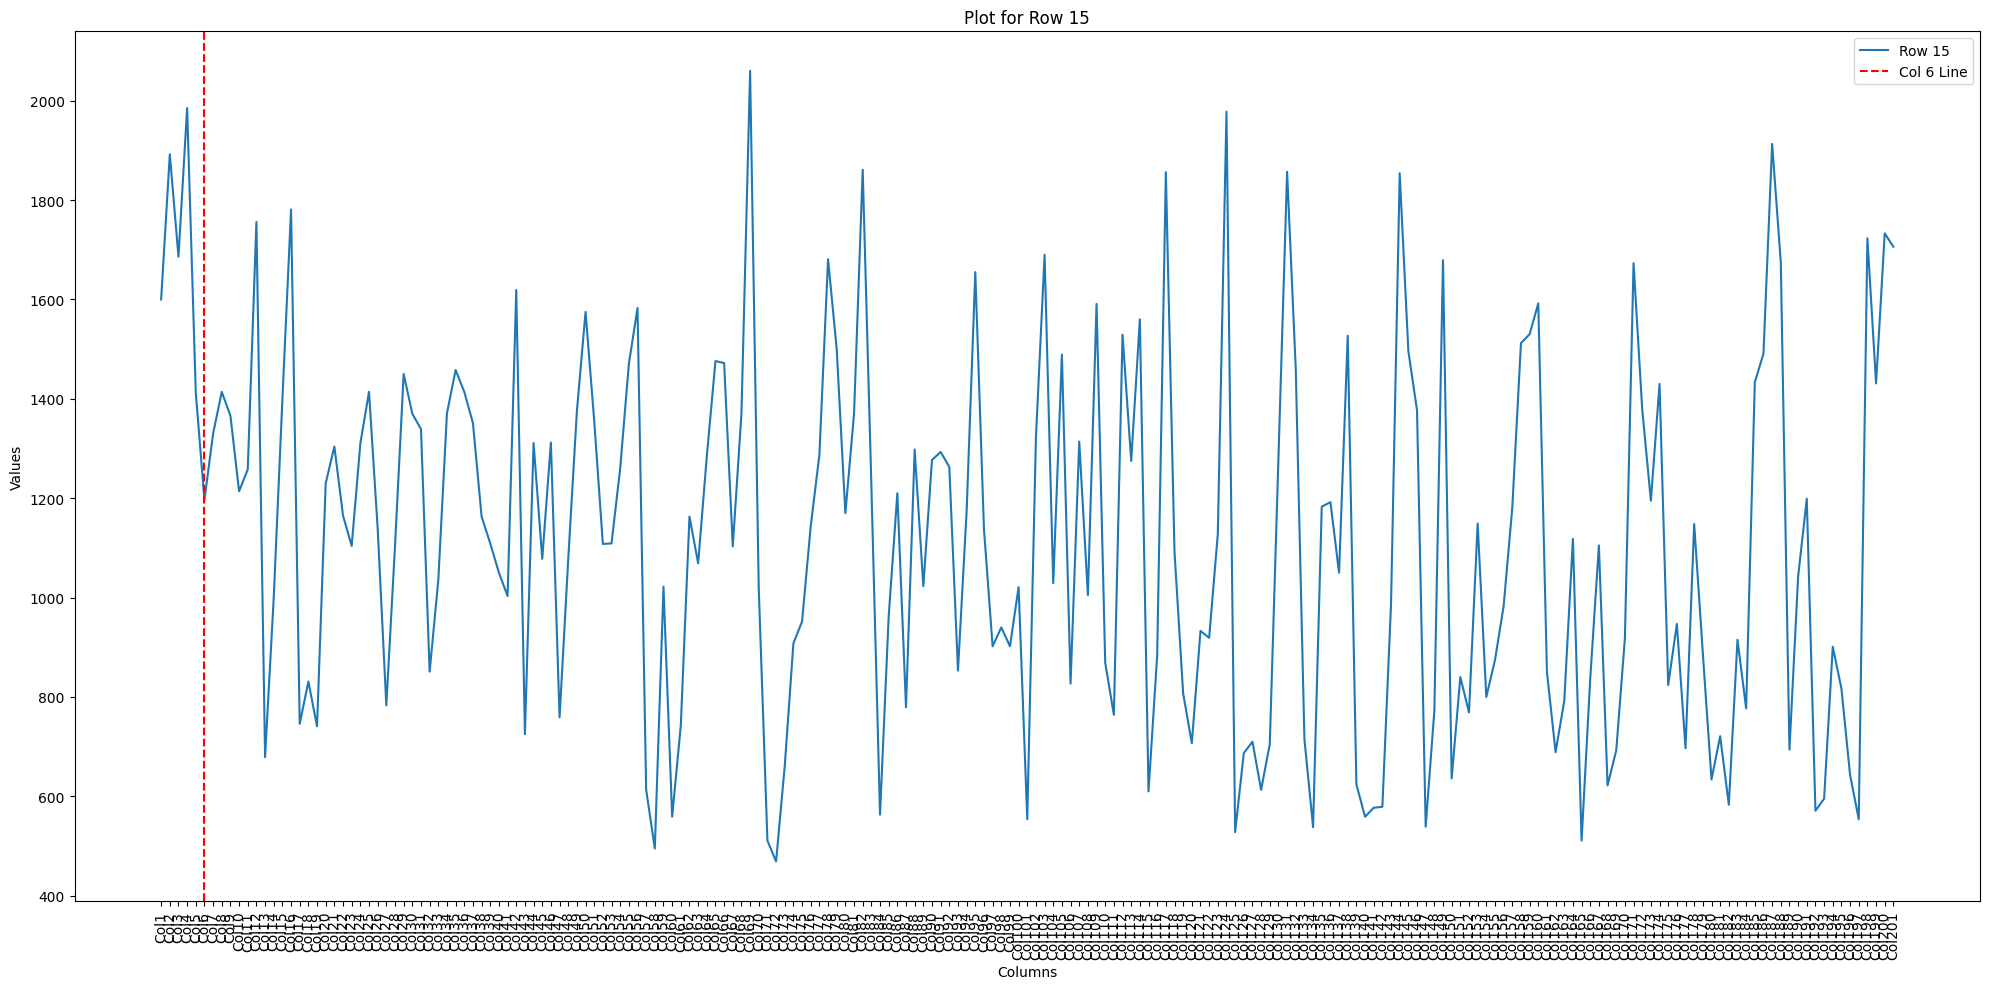

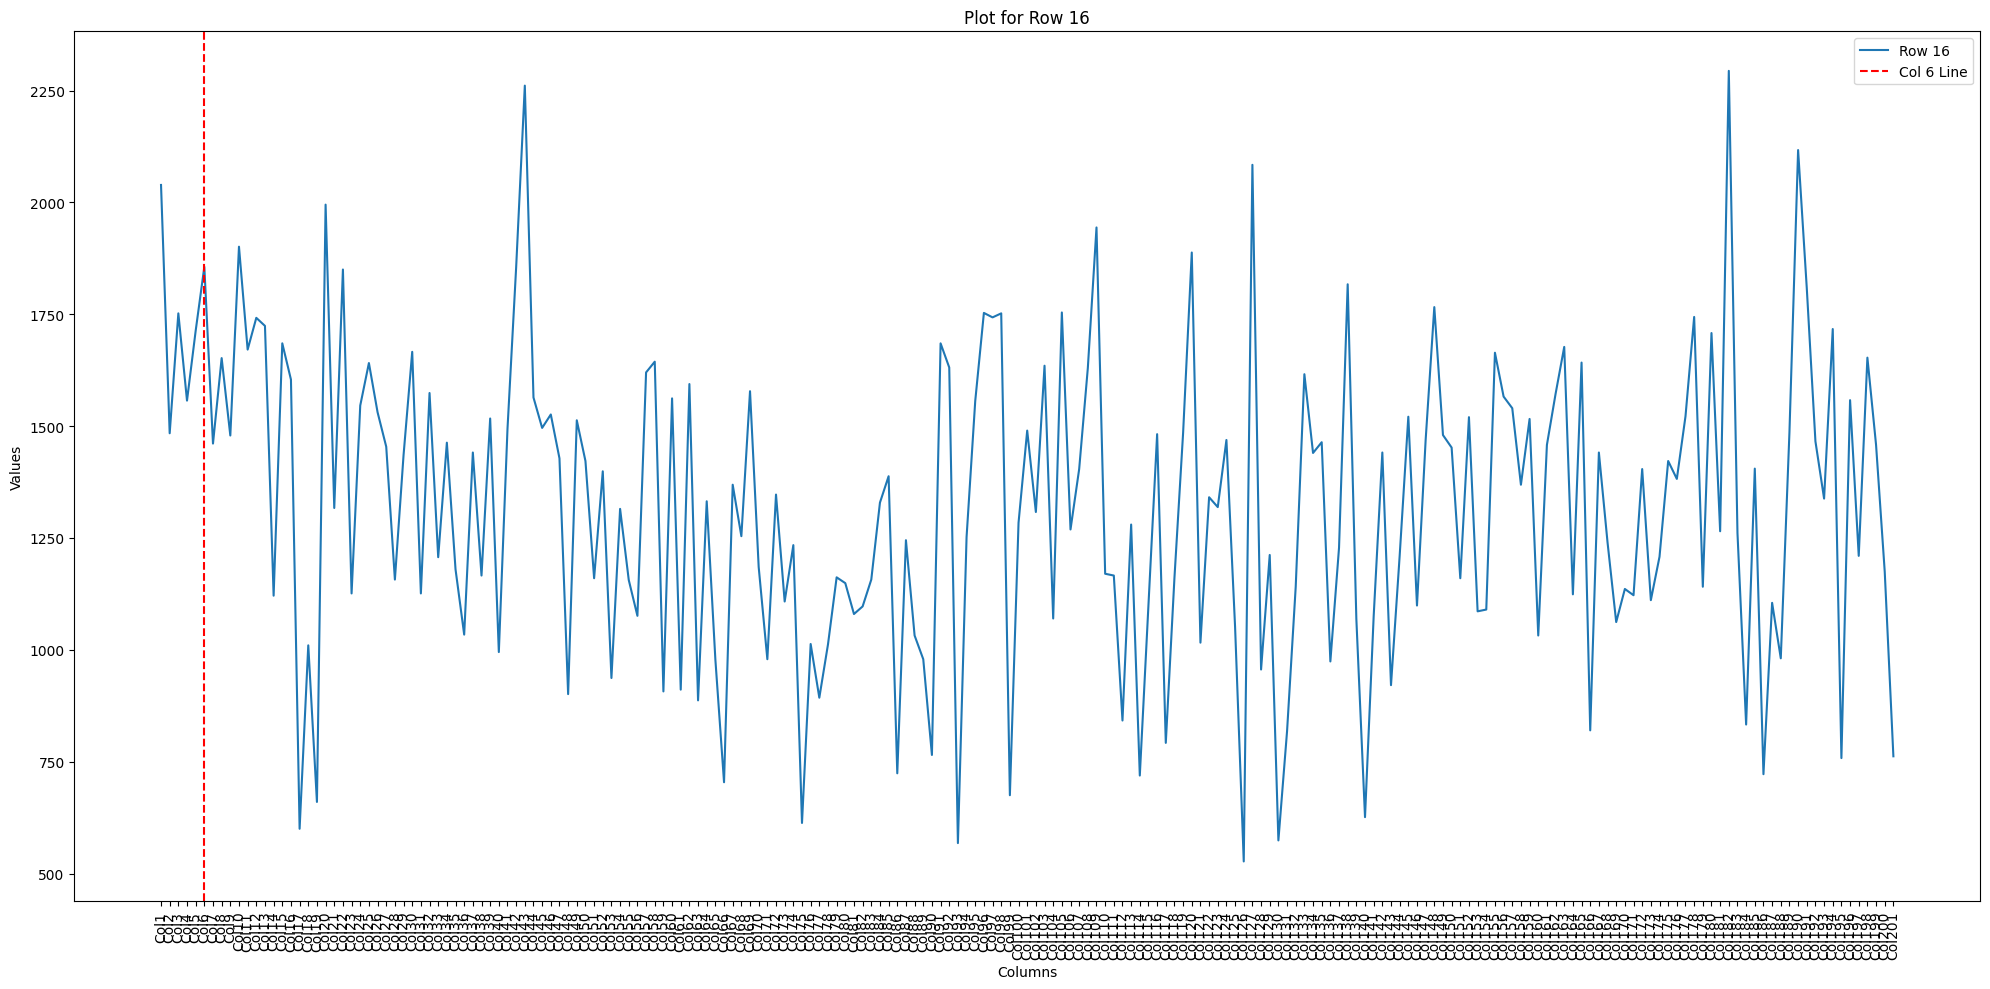

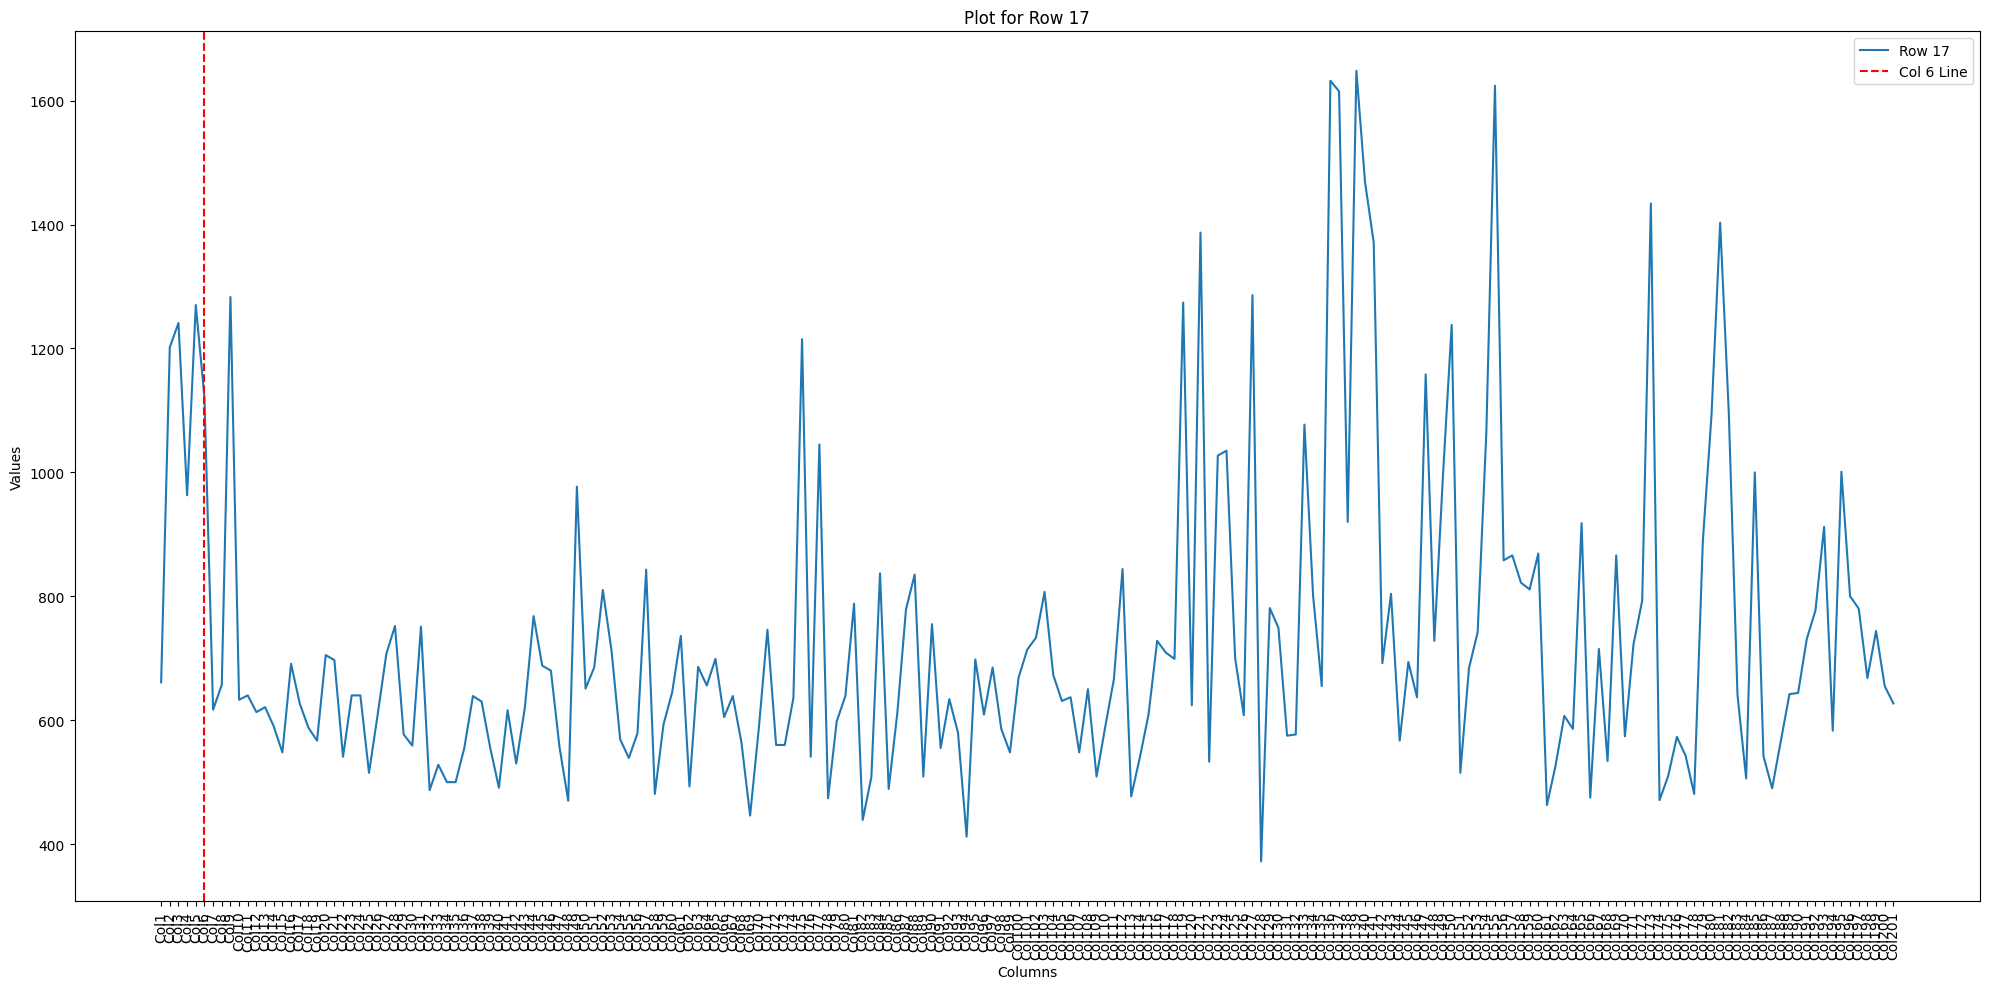

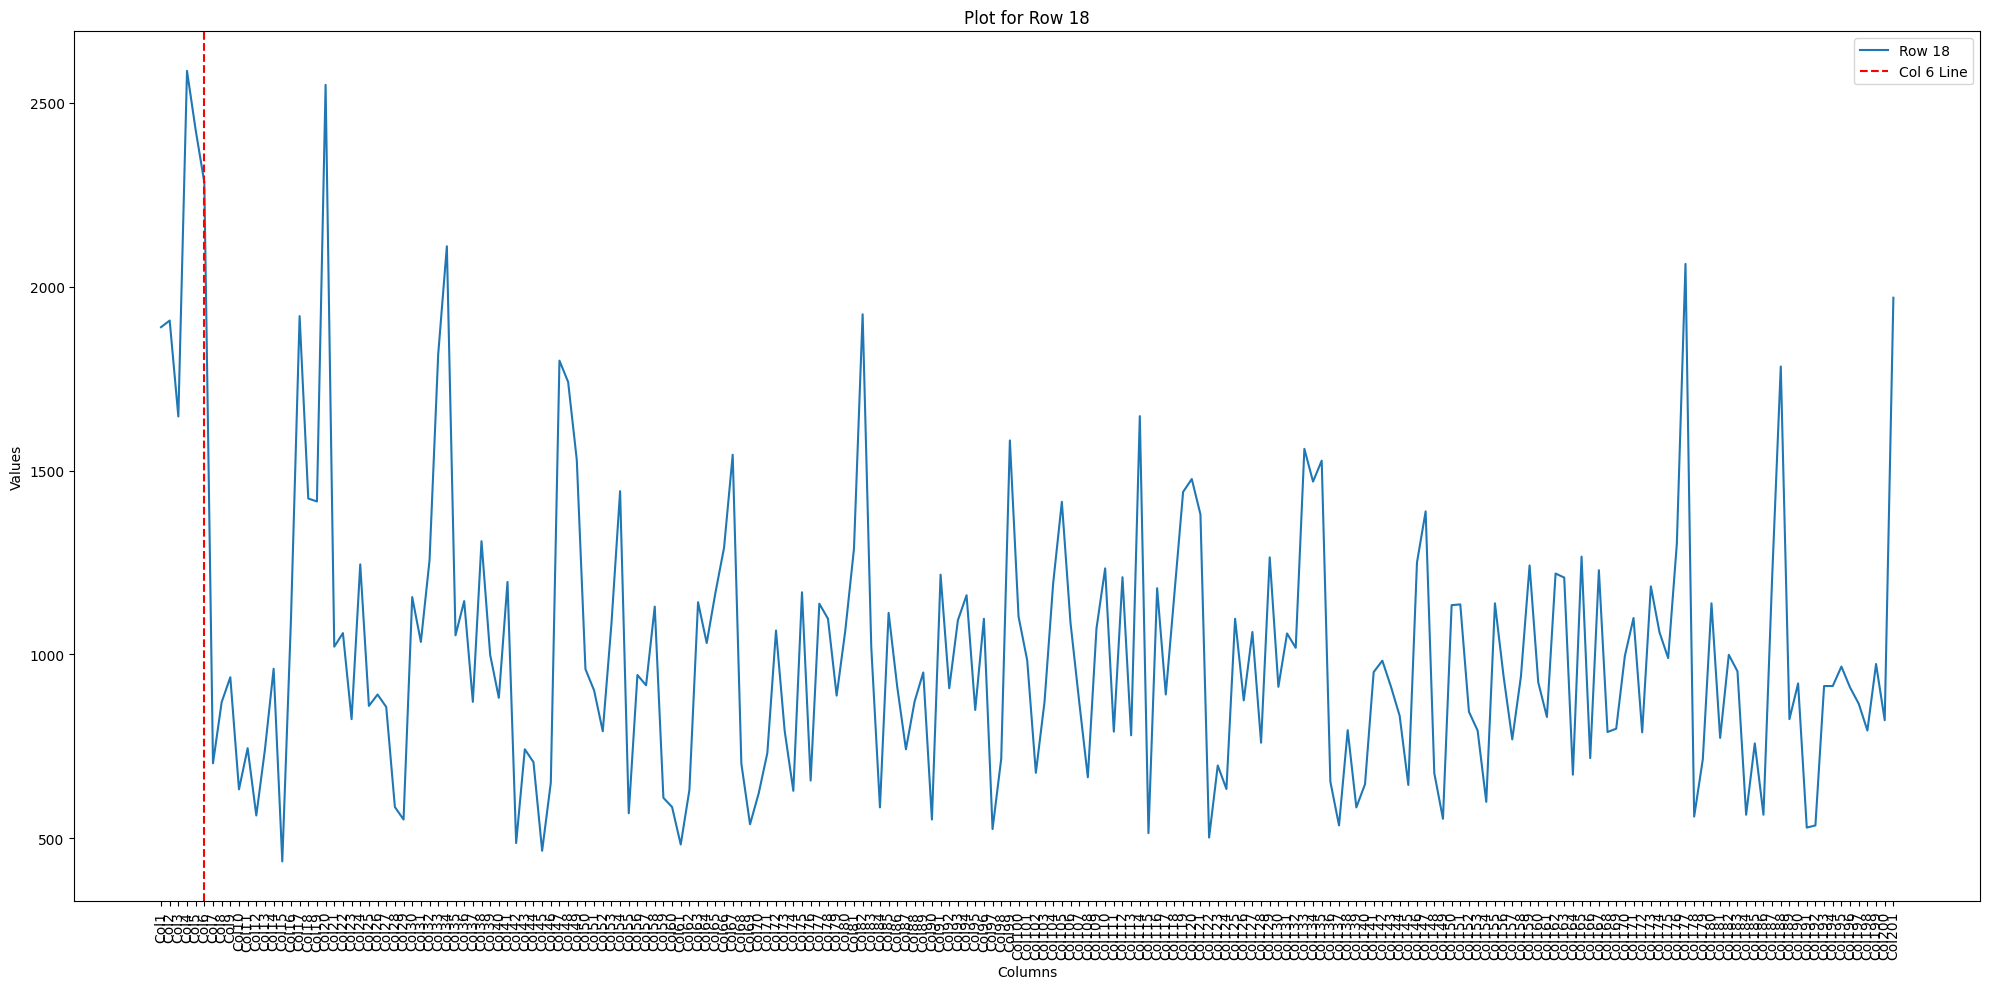

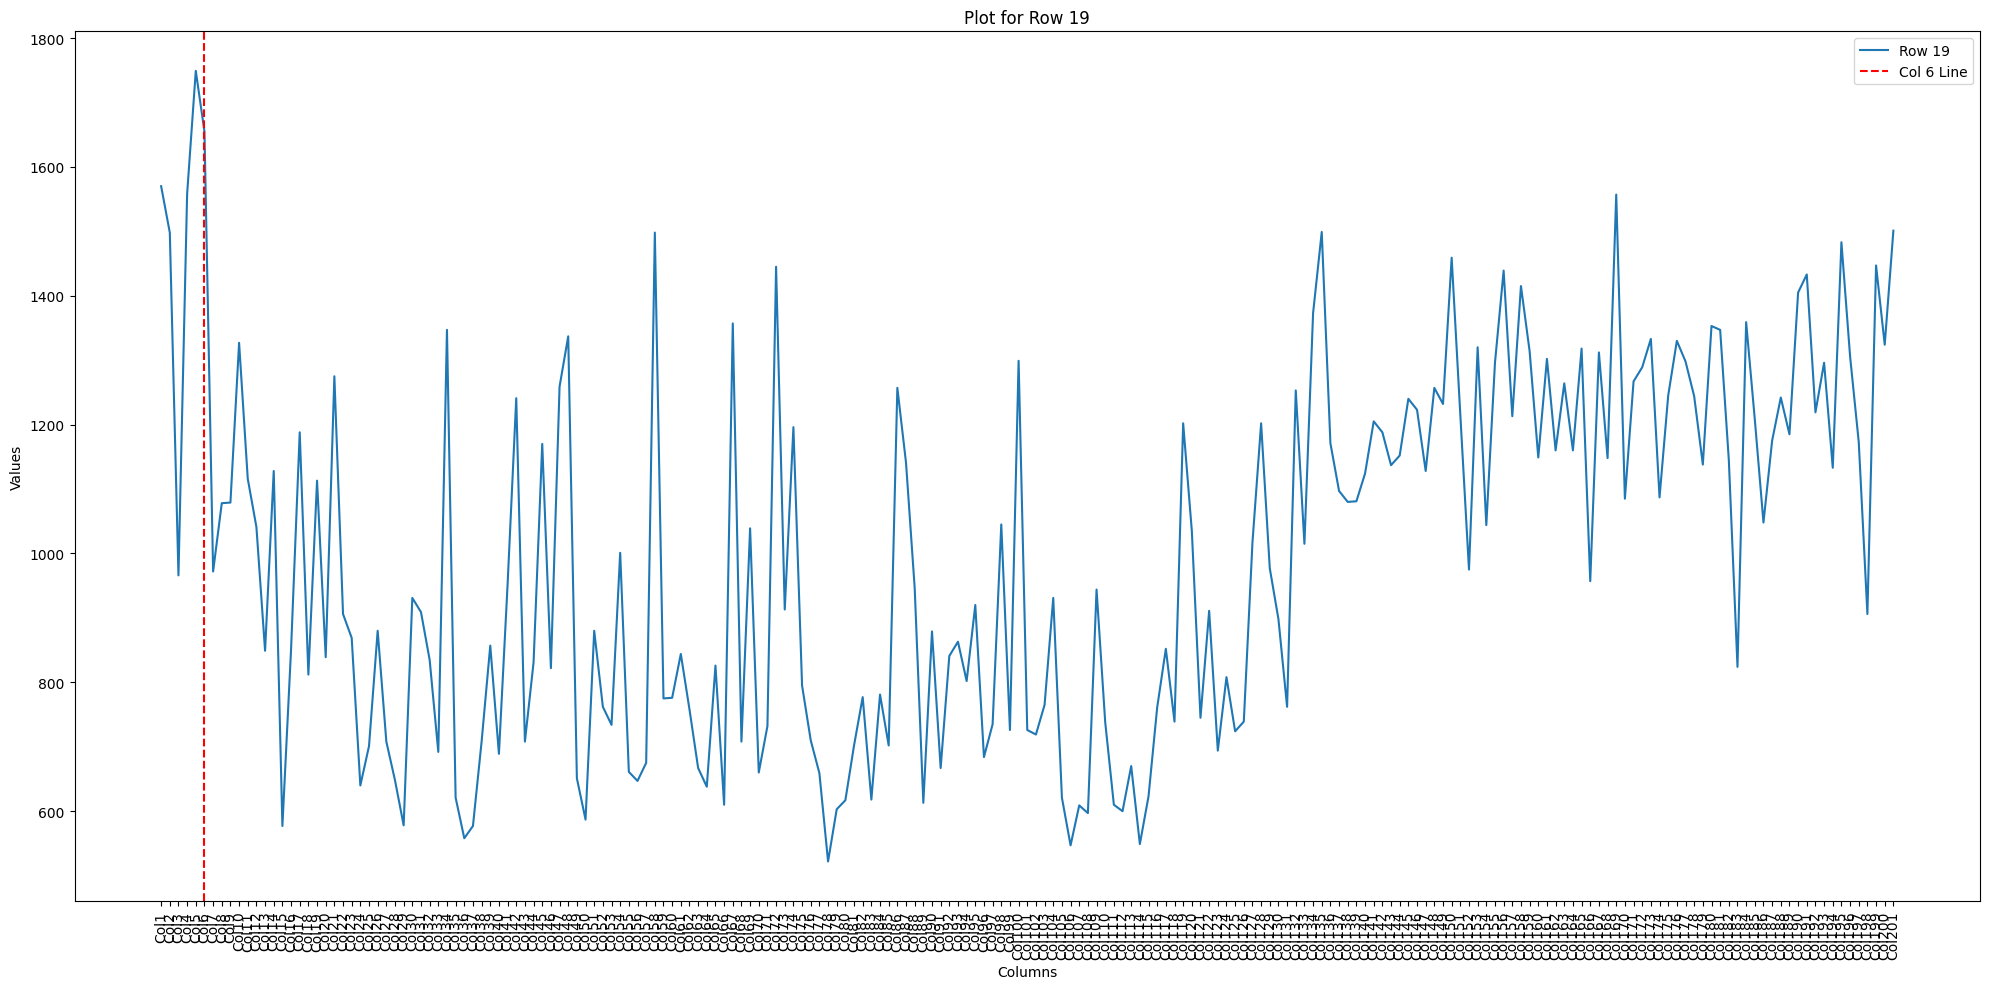

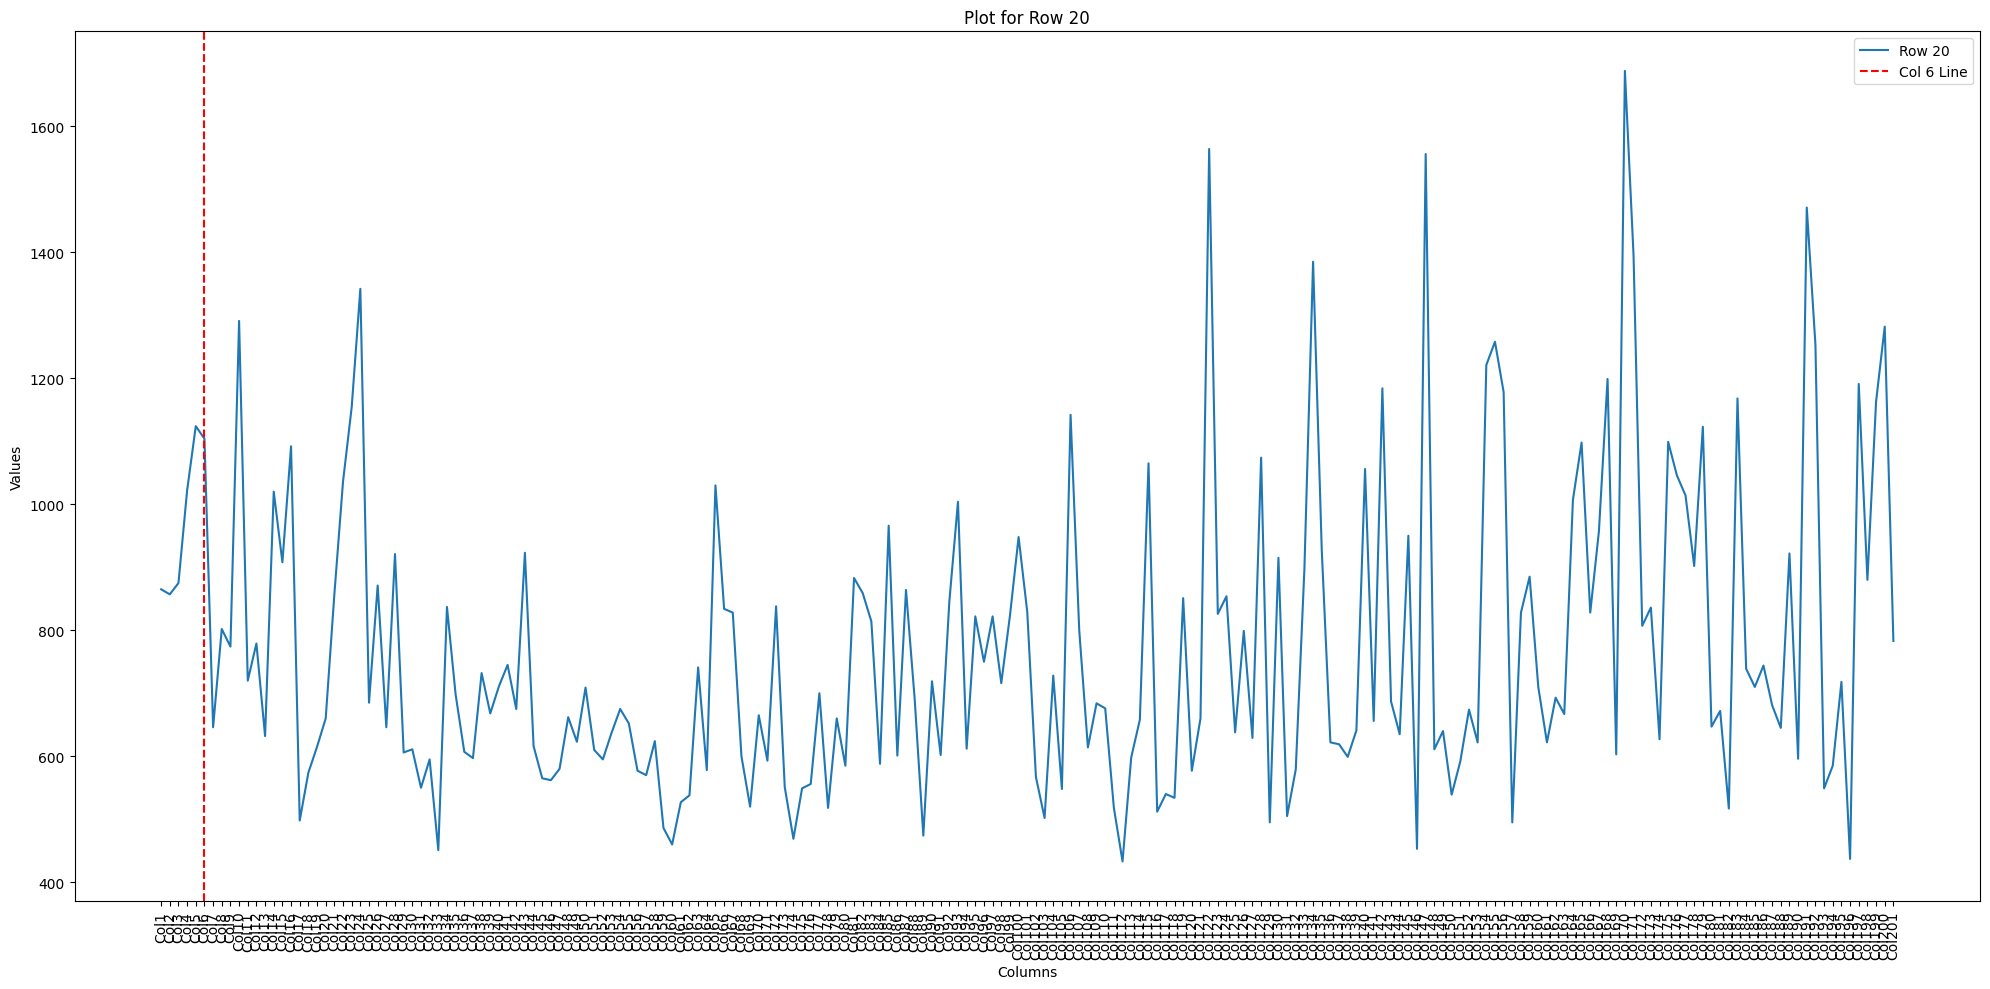

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_name = 'block_11_layer_Hidden_State_epoch_34_iteration_1250_max'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/token_probing_results_not_sorted/Hidden_State/{file_name}.csv'
data = pd.read_csv(file_path)
k = 201

# X축 라벨 정의 (Col1 ~ Col197)
x_labels = [f"Col{i}" for i in range(1, k+1)]
x_values = list(range(1, k+1))

# 플롯할 인덱스 리스트
indices_to_plot = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# 각 index에 대해 개별 그래프 생성
for index in indices_to_plot:
    plt.figure(figsize=(20, 10))  # 개별 그래프 크기 설정
    row = data.iloc[index]  # 해당 index의 row 추출
    plt.plot(x_values, row[:k], label=f"Row {index}")
    
    # X = Col6 (X값 6) 기준으로 수직선 추가
    plt.axvline(x=6, color='red', linestyle='--', linewidth=1.5, label="Col 6 Line")
    
    # 그래프에 라벨 추가
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.title(f"Plot for Row {index}")
    plt.xticks(x_values, x_labels, rotation=90)
    plt.legend(loc='upper right')
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()


In [ ]:
# Assuming the file has been successfully loaded
# Here we use a filtered approach to limit x-axis to Iteration <= 112539
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/shkim/QT_DeiT_small/reproduce/probe_report_finegrained_ag_fp/top3_indices_Hidden_State.csv"
data = pd.read_csv(file_path)
# Filter data for Iteration <= 112539
filtered_data = data[data['Iteration'] <= 112539]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Iteration'], filtered_data['Channel Index'], alpha=0.5, s=10)  # Dot plot

# Adding labels and title
plt.xlabel('Iteration')
plt.ylabel('Channel Index')
plt.title('Channel Index vs Iteration (Limited to Iteration <= 112539)')
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [ ]:
import os
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from sklearn.mixture import GaussianMixture
os.environ['CUDA_VISIBLE_DEVICES'] = '4,5,6,7'

#####################################
# 사용자 환경에 맞게 수정할 부분
directory_path = "/home/shkim/QT_DeiT_small/reproduce/bg_challenge/prefix_data"
mode = "rpt_background_patch"                   # "rpt_background_patch"로 고정
calibration = "gaussian"                             # "raw", "mean", "median", "gaussian" 중 택 1  
output_dir = f"/home/shkim/QT_DeiT_small/reproduce/bg_challenge/prefix_patch/{calibration}"
os.makedirs(output_dir, exist_ok=True)  # 출력 경로 생성
#####################################

if mode == "rpt_background_patch":
    # 특정 디렉토리에 있는 모든 이미지 파일들 불러와서 리스트로 저장
    image_paths = [os.path.join(directory_path, f) for f in os.listdir(directory_path) 
                   if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # 이미지 크기 변경
        transforms.ToTensor()           # [H, W, C] -> [C, H, W]로 변환 & [0,1] 정규화
    ])

    # 모든 이미지를 텐서로 변환 후 리스트에 저장
    patch_tensors = []
    for img_path in image_paths:
        img = Image.open(img_path).convert("RGB")
        patch_tensor = transform(img)  # shape: [C, 224, 224]
        patch_tensors.append(patch_tensor)

    patches_tensor = torch.stack(patch_tensors)  # [N, C, H, W]

    if calibration == "raw":
        # patch_tensors 각각을 npy 파일로 저장
        for i, patch in enumerate(patch_tensors):
            output_npy_path = os.path.join(output_dir, f"{i}.npy")
            np.save(output_npy_path, patch.numpy())
            print(f"Saved raw patch {i} at {output_npy_path}")

    elif calibration == "mean":
        # 모든 패치에 대해 픽셀 평균 -> [C, H, W]
        background_token = patches_tensor.mean(dim=0)
        output_npy_path = os.path.join(output_dir, "mean.npy")
        np.save(output_npy_path, background_token.numpy())
        print(f"Saved mean patch at {output_npy_path}")
        background_image = background_token.permute(1, 2, 0).numpy()  # [H, W, C]
        
        # 시각화
        plt.figure(figsize=(6, 6))
        plt.imshow(background_image)
        plt.axis('off')
        plt.title("Mean Background Token")
        plt.show()

    elif calibration == "median":
        # 모든 패치에 대해 픽셀 단위 중앙값 -> [C, H, W]
        patches_np = patches_tensor.numpy()  # [N, C, H, W]
        median_np = np.median(patches_np, axis=0)  # [C, H, W]
        background_token = torch.from_numpy(median_np).float()
        output_npy_path = os.path.join(output_dir, "median.npy")
        np.save(output_npy_path, background_token.numpy())
        print(f"Saved median patch at {output_npy_path}")
        background_image = background_token.permute(1, 2, 0).numpy()  # [H, W, C]
        
        # 시각화
        plt.figure(figsize=(6, 6))
        plt.imshow(background_image)
        plt.axis('off')
        plt.title("median Background Token")
        plt.show()

    elif calibration == "gaussian":
        # 가우시안 혼합모델 기반 대표값 추출 (계산량 많음)
        patches_np = patches_tensor.numpy()  # [N, C, H, W]
        N, C, H, W = patches_np.shape
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        patches_tensor = patches_tensor.to(device)
        representative_tensor = torch.zeros((C, H, W), device=patches_tensor.device)

        num_components = 3  # GMM에서 사용할 가우시안 분포 개수
        max_iter = 50 
        for c in range(C):  # 채널 단위 (RGB 각각 처리)
            for h_ in range(H):  # 높이 방향 처리
                for w_ in range(W):  # 너비 방향 처리
                    # 해당 픽셀 위치의 N개 값 가져오기 -> shape: (N,)
                    pixel_values = patches_tensor[:, c, h_, w_]  # [N]
                    pixel_values = pixel_values.unsqueeze(1)  # [N, 1]

                    # GMM 초기화
                    means = torch.linspace(pixel_values.min(), pixel_values.max(), num_components, device=pixel_values.device).unsqueeze(1)
                    weights = torch.ones(num_components, device=pixel_values.device) / num_components
                    variances = torch.ones(num_components, device=pixel_values.device) * pixel_values.var()

                    # GMM 최적화 반복
                    for _ in range(max_iter):
                        # E-step: 책임도 계산 (Gaussian PDF)
                        gaussians = torch.exp(-0.5 * (pixel_values - means.T) ** 2 / variances.T) / torch.sqrt(2 * torch.pi * variances.T)
                        responsibilities = weights * gaussians
                        responsibilities = responsibilities / responsibilities.sum(dim=1, keepdim=True)

                        # M-step: 가우시안 파라미터 업데이트
                        weights = responsibilities.mean(dim=0)
                        means = (responsibilities * pixel_values).sum(dim=0) / responsibilities.sum(dim=0)
                        variances = ((responsibilities * (pixel_values - means.T) ** 2).sum(dim=0) / responsibilities.sum(dim=0)).clamp(min=1e-6)

                    # 기대값 (weighted mean) 계산
                    expected_value = (weights * means).sum()
                    representative_tensor[c, h_, w_] = expected_value
        representative_image = representative_tensor.permute(1, 2, 0).cpu().numpy()
        plt.figure(figsize=(6, 6))
        plt.imshow(representative_image)
        plt.axis('off')
        plt.title("Gaussian Mixture Model - Background Token")
        plt.show()
        output_npy_path = os.path.join(output_dir, "gaussian.npy")
        np.save(output_npy_path, representative_image)
        print(f"Saved gaussian patch at {output_npy_path}")

    else:
        raise ValueError("Unknown calibration mode.")